In [20]:
import numpy as np

samples = np.load('results/samples_agg_E_serie_350.npz')
samplesV = np.load('results/samples_aggV_CI_hfr04_E_serie_360.npz')

In [21]:
import pandas as pd
import os
from functions.adjust_cases_functions import prepare_cases, smooth_1d
# read population
pop        = 49263774.0


# read cases by age without filtering
# previously group them in the ages of interest.
cases_df = pd.read_csv(os.path.join('data/Datos.csv'), delimiter=";", parse_dates=["Dates"]).set_index('Dates')
cases_df = prepare_cases(cases_df, col='InfectadosNoVacunados')
cases_df = prepare_cases(cases_df, col='InfectadosPrimeraDosis')
cases_df = prepare_cases(cases_df, col='InfectadosEsquemaCompleto')
cases_df = prepare_cases(cases_df, col='InfectadosDosisRefuerzo')
cases_df = prepare_cases(cases_df, col='InfectadosVacunados')
cases_df = prepare_cases(cases_df, col='InfectadosTotal')
cases_df = prepare_cases(cases_df, col='HospitalizadosNoVacunados')
cases_df = prepare_cases(cases_df, col='HospitalizadosPrimeraDosis')
cases_df = prepare_cases(cases_df, col='HospitalizadosEsquemaCompleto')
cases_df = prepare_cases(cases_df, col='HospitalizadosDosisRefuerzo')
cases_df = prepare_cases(cases_df, col='HospitalizadosVacunados')
cases_df = prepare_cases(cases_df, col='HospitalizadosTotal')
cases_df = prepare_cases(cases_df, col='MuertesNoVacunados')
cases_df = prepare_cases(cases_df, col='MuertesPrimeraDosis')
cases_df = prepare_cases(cases_df, col='MuertesEsquemaCompleto')
cases_df = prepare_cases(cases_df, col='MuertesDosisRefuerzo')
cases_df = prepare_cases(cases_df, col='MuertosVacunados')
cases_df = prepare_cases(cases_df, col='MuertesTotal')
cases_df

,InfectadosNoVacunados,InfectadosPrimeraDosis,InfectadosEsquemaCompleto,InfectadosDosisRefuerzo,InfectadosVacunados,InfectadosTotal,HospitalizadosNoVacunados,HospitalizadosPrimeraDosis,HospitalizadosEsquemaCompleto,HospitalizadosDosisRefuerzo,...,smoothed_HospitalizadosEsquemaCompleto,smoothed_HospitalizadosDosisRefuerzo,smoothed_HospitalizadosVacunados,smoothed_HospitalizadosTotal,smoothed_MuertesNoVacunados,smoothed_MuertesPrimeraDosis,smoothed_MuertesEsquemaCompleto,smoothed_MuertesDosisRefuerzo,smoothed_MuertosVacunados,smoothed_MuertesTotal
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-06,1,0,0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-09,2,0,0,0,0,2,1,0,0,0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-11,6,0,0,0,0,6,3,0,0,0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-12,4,0,0,0,0,4,3,0,0,0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-13,5,0,0,0,0,5,3,0,0,0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03,1674,0,0,0,0,1674,0,0,0,0,...,0.0,0.0,0.0,0.0,52.0,1.0,5.0,0.0,6.0,58.0
2021-11-04,1862,0,0,0,0,1862,0,0,0,0,...,0.0,0.0,0.0,0.0,52.0,1.0,2.0,0.0,3.0,55.0
2021-11-05,1760,0,0,0,0,1760,0,0,0,0,...,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,53.0


In [22]:
date_init  = pd.to_datetime("2020-03-06")
date_end   = pd.to_datetime("2021-02-14")

dates_week = pd.date_range(start=date_init, end=date_end, freq='1D')
dates      = pd.date_range(start=date_init, end=dates_week[-1], freq='1D')

num_steps = len(dates_week)

In [23]:
date_initV  = pd.to_datetime("2021-02-15")
date_endV   = pd.to_datetime("2021-10-27")

dates_weekV = pd.date_range(start=date_initV, end=date_endV, freq='1D')
datesV     = pd.date_range(start=date_initV, end=dates_weekV[-1], freq='1D')

num_stepsV = len(dates_weekV)

In [24]:
bog_cases_df = cases_df.reset_index()
obs_df = bog_cases_df
obs_df = obs_df.set_index("Dates")
obs_df  = obs_df.loc[date_init:date_end]

# obs_w_df             = obs_df.resample('W-Sun').sum()

oev_df                     = pd.DataFrame(columns=["Dates", "OEV_confirmed", "OEV_deaths"])
oev_df["Dates"]            = obs_df.index.values
oev_df                     = oev_df.set_index("Dates")
oev_df["OEV_confirmed"]    = np.maximum(1e-4, obs_df["smoothed_InfectadosNoVacunados"].values**2/100 )
oev_df["OEV_hospitalized"] = np.maximum(1e-4, obs_df["smoothed_HospitalizadosNoVacunados"].values**2/100 )
oev_df["OEV_deaths"]       = np.maximum(25, obs_df["smoothed_MuertesNoVacunados"].values**2/100 )

dates_assimilation = obs_df.index.get_level_values(0).values
dates = dates_assimilation
num_steps = len(dates)

In [25]:
bog_cases_dfV = cases_df.reset_index()
obs_dfV = bog_cases_dfV
obs_dfV = obs_dfV.set_index("Dates")
obs_dfV  = obs_dfV.loc[date_initV:date_endV]

# obs_w_df             = obs_df.resample('W-Sun').sum()

oev_dfV                     = pd.DataFrame(columns=["Dates", "OEV_confirmedV", "OEV_deathsV"])
oev_dfV["Dates"]            = obs_dfV.index.values
oev_dfV                     = oev_dfV.set_index("Dates")
oev_dfV["OEV_confirmedV"]    = np.maximum(1e-4, obs_dfV["smoothed_InfectadosPrimeraDosis"].values**2/100 )
oev_dfV["OEV_hospitalizedV"] = np.maximum(1e-4, obs_dfV["smoothed_HospitalizadosPrimeraDosis"].values**2/100 )
oev_dfV["OEV_deathsV"]       = np.maximum(25, obs_dfV["smoothed_MuertesPrimeraDosis"].values**2/100 )

dates_assimilationV = obs_dfV.index.get_level_values(0).values
datesV = dates_assimilationV
num_stepsV = len(datesV)

In [26]:
bog_cases_dfV2 = cases_df.reset_index()
obs_dfV2 = bog_cases_dfV2
obs_dfV2 = obs_dfV2.set_index("Dates")
obs_dfV2  = obs_dfV2.loc[date_initV:date_endV]

# obs_w_df             = obs_df.resample('W-Sun').sum()

oev_dfV2                     = pd.DataFrame(columns=["Dates", "OEV_confirmedV2", "OEV_deathsV2"])
oev_dfV2["Dates"]            = obs_dfV2.index.values
oev_dfV2                     = oev_dfV2.set_index("Dates")
oev_dfV2["OEV_confirmedV2"]    = np.maximum(1e-4, obs_dfV2["smoothed_InfectadosEsquemaCompleto"].values**2/100 )
oev_dfV2["OEV_hospitalizedV2"] = np.maximum(1e-4, obs_dfV2["smoothed_HospitalizadosEsquemaCompleto"].values**2/100 )
oev_dfV2["OEV_deathsV2"]       = np.maximum(25, obs_dfV2["smoothed_MuertesEsquemaCompleto"].values**2/100 )

dates_assimilationV = obs_dfV.index.get_level_values(0).values
datesV = dates_assimilationV
num_stepsV = len(datesV)

In [27]:
num_stepsV

255

In [28]:
def create_df_response(samples, time, date_init ='2020-03-06',  quantiles = [50, 80, 95], forecast_horizon=27, dates=None, use_future=False):
    """[summary]

    Args:
        samples ([type]): [description]
        time ([type]): [description]
        date_init (str, optional): [description]. Defaults to '2020-03-06'.
        forecast_horizon (int, optional): [description]. Defaults to 27.
        use_future (bool, optional): [description]. Defaults to False.

    Returns:
        [type]: [description]
    """
    if dates is not None:
        dates_fitted = dates
    else:
        dates_fitted   = pd.date_range(start=pd.to_datetime(date_init), periods=time)
        dates_forecast = pd.date_range(start=dates_fitted[-1]+datetime.timedelta(1), periods=forecast_horizon)

    dates = list(dates_fitted)
    types = ['estimate']*len(dates_fitted)
    if use_future:
        dates += list(dates_forecast)
        types  += ['forecast']*len(dates_forecast)

    results_df = pd.DataFrame(samples.T)
    df_response = pd.DataFrame(index=dates)
    # Calculate key statistics
    df_response['mean']        = results_df.mean(axis=1).values
    df_response['median']      = results_df.median(axis=1).values
    df_response['std']         = results_df.std(axis=1).values

    for quant in quantiles:
        low_q  = ((100-quant)/2)/100
        high_q = 1-low_q

        df_response[f'low_{quant}']  = results_df.quantile(q=low_q, axis=1).values
        df_response[f'high_{quant}'] = results_df.quantile(q=high_q, axis=1).values

    df_response['type']        =  types
    df_response.index.name = 'date'
    return df_response

In [29]:
param_post = samples['param_posterior']
param_postV = samplesV['param_posterior']
param_post.shape

(2, 200, 344, 350)

In [30]:
beta_post_all = param_post[0,:,:,:]
alpha_post_all = param_post[1,:,:,:]

beta_time   = np.mean(beta_post_all[:,:,:], -1)
alpha_time = np.mean(alpha_post_all[:,:,:], -1)

beta_post_allV = param_postV[0,:,:,:]
alpha_post_allV = param_postV[1,:,:,:]

beta_timeV   = np.mean(beta_post_allV[:,:,:], -1)
alpha_timeV = np.mean(alpha_post_allV[:,:,:], -1)

beta_time.shape

(200, 344)

In [31]:
beta_timeV.shape

(200, 255)

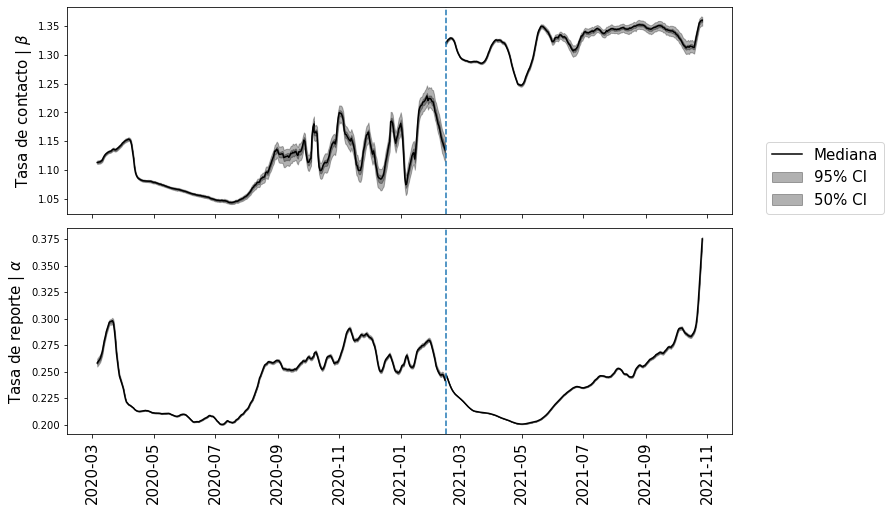

In [32]:
import matplotlib.pyplot as plt
df_beta  = create_df_response(beta_time, time=num_steps, dates =dates_assimilation)
df_betaV  = create_df_response(beta_timeV, time=num_stepsV, dates =dates_assimilationV)
df_alpha = create_df_response(alpha_time, time=num_steps, dates =dates_assimilation)
df_alphaV = create_df_response(alpha_timeV, time=num_stepsV, dates =dates_assimilationV)

fig, ax = plt.subplots(2, 1, figsize=(12.5, 7.2), sharex=True)
ax[0].plot(df_beta.index.values, df_beta["median"], color='k', label='Mediana')
ax[0].fill_between(df_beta.index.values, df_beta["high_95"], df_beta["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0].fill_between(df_beta.index.values, df_beta["high_50"], df_beta["low_50"], color='k', alpha=0.3, label='50% CI')

ax[0].plot(df_betaV.index.values, df_betaV["median"], color='k')#, label='Median')
ax[0].fill_between(df_betaV.index.values, df_betaV["high_95"], df_betaV["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[0].fill_between(df_betaV.index.values, df_betaV["high_50"], df_betaV["low_50"], color='k', alpha=0.3)#, label='50% CI')

ax[1].plot(df_alpha.index.values, df_alpha["median"], color='k', label='Median')
ax[1].fill_between(df_alpha.index.values, df_alpha["high_95"], df_alpha["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1].fill_between(df_alpha.index.values, df_alpha["high_50"], df_alpha["low_50"], color='k', alpha=0.3, label='50% CI')

ax[1].plot(df_alphaV.index.values, df_alphaV["median"], color='k')#, label='Median')
ax[1].fill_between(df_alphaV.index.values, df_alphaV["high_95"], df_alphaV["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax[1].fill_between(df_alphaV.index.values, df_alphaV["high_50"], df_alphaV["low_50"], color='k', alpha=0.3)#, label='50% CI')

ax[1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
# ax.set_xlabel("Fechas", fontsize=15)
ax[0].set_ylabel(r"Tasa de contacto | $\beta$ ", fontsize=15)
# ax.set_title(r"Tasa de contacto | $\beta$ ", fontsize=15)
# ax[0].legend(fontsize=15, loc='upper right')
ax[0].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')

ax[1].set_ylabel(r"Tasa de reporte | $\alpha$", fontsize=15)
# ax[1].set_title(r"Tasa de reporte | $\alpha$ ", fontsize=15)
ax[0].legend(fontsize=15, loc=[1.05,0])
ax[1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
plt.tight_layout()
plt.show()

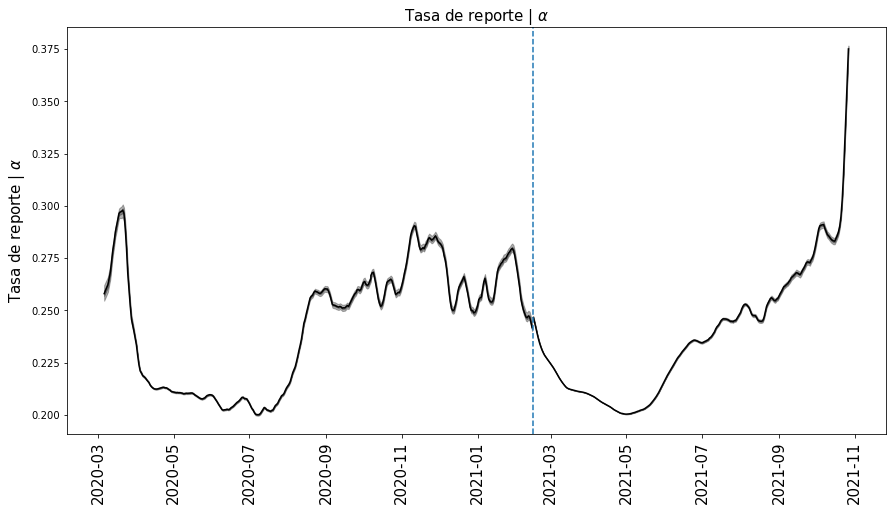

In [33]:
df_alpha = create_df_response(alpha_time, time=num_steps, dates =dates_assimilation)
df_alphaV = create_df_response(alpha_timeV, time=num_stepsV, dates =dates_assimilationV)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))
ax.plot(df_alpha.index.values, df_alpha["median"], color='k', label='Median')
ax.fill_between(df_alpha.index.values, df_alpha["high_95"], df_alpha["low_95"], color='k', alpha=0.3, label='95% CI')
ax.fill_between(df_alpha.index.values, df_alpha["high_50"], df_alpha["low_50"], color='k', alpha=0.3, label='50% CI')

ax.plot(df_alphaV.index.values, df_alphaV["median"], color='k')#, label='Median')
ax.fill_between(df_alphaV.index.values, df_alphaV["high_95"], df_alphaV["low_95"], color='k', alpha=0.3)#, label='95% CI')
ax.fill_between(df_alphaV.index.values, df_alphaV["high_50"], df_alphaV["low_50"], color='k', alpha=0.3)#, label='50% CI')

ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
# ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel(r"Tasa de reporte | $\alpha$", fontsize=15)
ax.set_title(r"Tasa de reporte | $\alpha$ ", fontsize=15)
# ax.legend(fontsize=15, loc='best')
ax.axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
plt.tight_layout()
plt.show()

In [34]:
x_post_all = samples['x_posterior']
x_post_allV = samplesV['x_posterior']
x_post_allV.shape

(27, 200, 255, 4)

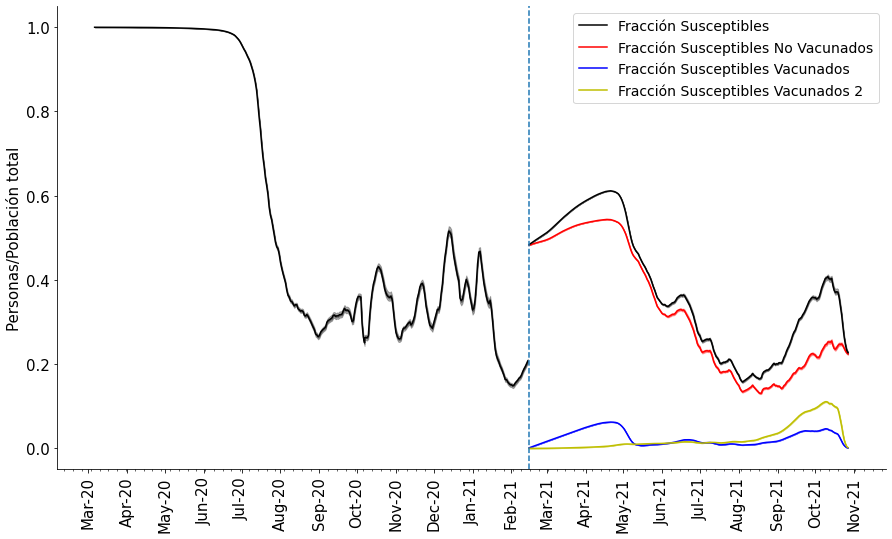

In [35]:
from matplotlib import dates as mdates
S_time = np.mean(x_post_all[0,:,:,:6], -1)
R_time = np.mean(x_post_all[5,:,:,:6], -1)
S_timeV = np.mean(x_post_allV[0,:,:,:6], -1)
R_timeV = np.mean(x_post_allV[5,:,:,:6], -1)
SV_timeV = np.mean(x_post_allV[9,:,:,:6], -1)
RV_timeV = np.mean(x_post_allV[14,:,:,:6], -1)
SV_timeV2 = np.mean(x_post_allV[18,:,:,:6], -1)
RV_timeV2 = np.mean(x_post_allV[23,:,:,:6], -1)
S_Time = S_timeV+SV_timeV+SV_timeV2

# S_timeV = S_timeV + SV_timeV
# R_timeV = R_timeV + RV_timeV

df_S  = create_df_response(S_time, time=num_steps, dates =dates_assimilation)
df_R  = create_df_response(R_time, time=num_steps, dates =dates_assimilation)
df_SV  = create_df_response(S_timeV, time=num_stepsV, dates =dates_assimilationV)
df_RV  = create_df_response(R_timeV, time=num_stepsV, dates =dates_assimilationV)
df_SVV  = create_df_response(SV_timeV, time=num_stepsV, dates =dates_assimilationV)
df_RVV  = create_df_response(RV_timeV, time=num_stepsV, dates =dates_assimilationV)
df_SVV2  = create_df_response(SV_timeV2, time=num_stepsV, dates =dates_assimilationV)
df_RVV2  = create_df_response(RV_timeV2, time=num_stepsV, dates =dates_assimilationV)
df_ST  = create_df_response(S_Time, time=num_stepsV, dates =dates_assimilationV)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.6))

ax.plot(df_S.index.values, df_S["median"]/pop, color='k', label='Fracción Susceptibles')
ax.fill_between(df_S.index.values, df_S["high_95"]/pop, df_S["low_95"]/pop, color='k', alpha=0.3)#, label='95% CI')
ax.fill_between(df_S.index.values, df_S["high_50"]/pop, df_S["low_50"]/pop, color='k', alpha=0.3)#, label='50% CI')

ax.plot(df_SV.index.values, df_SV["median"]/pop, color='r', label='Fracción Susceptibles No Vacunados')
ax.fill_between(df_SV.index.values, df_SV["high_95"]/pop, df_SV["low_95"]/pop, color='r', alpha=0.3)#, label='95% CI')
ax.fill_between(df_SV.index.values, df_SV["high_50"]/pop, df_SV["low_50"]/pop, color='r', alpha=0.3)#, label='50% CI')

ax.plot(df_SVV.index.values, df_SVV["median"]/pop, color='b', label='Fracción Susceptibles Vacunados')
ax.fill_between(df_SVV.index.values, df_SVV["high_95"]/pop, df_SVV["low_95"]/pop, color='b', alpha=0.3)#, label='95% CI')
ax.fill_between(df_SVV.index.values, df_SVV["high_50"]/pop, df_SVV["low_50"]/pop, color='b', alpha=0.3)#, label='50% CI')

ax.plot(df_SVV2.index.values, df_SVV2["median"]/pop, color='y', label='Fracción Susceptibles Vacunados 2')
ax.fill_between(df_SVV2.index.values, df_SVV2["high_95"]/pop, df_SVV2["low_95"]/pop, color='y', alpha=0.3)#, label='95% CI')
ax.fill_between(df_SVV2.index.values, df_SVV2["high_50"]/pop, df_SVV2["low_50"]/pop, color='y', alpha=0.3)#, label='50% CI')

ax.plot(df_ST.index.values, df_ST["median"]/pop, color='k')#, label='Fracción Susceptibles')
ax.fill_between(df_ST.index.values, df_ST["high_95"]/pop, df_ST["low_95"]/pop, color='k', alpha=0.3)#, label='95% CI')
ax.fill_between(df_ST.index.values, df_ST["high_50"]/pop, df_ST["low_50"]/pop, color='k', alpha=0.3)#, label='50% CI')

# ax.plot(df_R.index.values, df_R["median"]/pop, color='c')#, label='Mediana')
# ax.fill_between(df_R.index.values, df_R["high_95"]/pop, df_R["low_95"]/pop, color='c', alpha=0.3)#, label='95% CI')
# ax.fill_between(df_R.index.values, df_R["high_50"]/pop, df_R["low_50"]/pop, color='c', alpha=0.3)#, label='50% CI')

# ax.plot(df_RV.index.values, df_RV["median"]/pop, color='c', label='Fracción Recuperados')
# ax.fill_between(df_RV.index.values, df_RV["high_95"]/pop, df_RV["low_95"]/pop, color='c', alpha=0.3)#, label='95% CI')
# ax.fill_between(df_RV.index.values, df_RV["high_50"]/pop, df_RV["low_50"]/pop, color='c', alpha=0.3)#, label='50% CI')

# ax.plot(df_RVV.index.values, df_RVV["median"]/pop, color='m', label='Fracción Recuperados Vacunados')
# ax.fill_between(df_RVV.index.values, df_RVV["high_95"]/pop, df_RVV["low_95"]/pop, color='m', alpha=0.3)#, label='95% CI')
# ax.fill_between(df_RVV.index.values, df_RVV["high_50"]/pop, df_RVV["low_50"]/pop, color='m', alpha=0.3)#, label='50% CI')

# ax.plot(df_RVV2.index.values, df_RVV2["median"]/pop, color='g', label='Fracción Recuperados Vacunados 2')
# ax.fill_between(df_RVV2.index.values, df_RVV2["high_95"]/pop, df_RVV2["low_95"]/pop, color='g', alpha=0.3)#, label='95% CI')
# ax.fill_between(df_RVV2.index.values, df_RVV2["high_50"]/pop, df_RVV2["low_50"]/pop, color='g', alpha=0.3)#, label='50% CI')



#sns.barplot(data=df_response, x='date', y='valuye')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
ax.tick_params( which='both', axis='both', labelsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
# ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Personas/Población total", fontsize=15)
ax.axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')

# ax[1].xaxis.set_major_locator(mdates.MonthLocator())
# ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
# ax[1].xaxis.set_minor_locator(mdates.WeekdayLocator())
# ax[1].tick_params( which='both', axis='both', labelsize=15)
# ax[1].spines['right'].set_visible(False)
# ax[1].spines['top'].set_visible(False)

# ax[1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
# ax[1].set_xlabel("Date", fontsize=15)
# ax[1].set_ylabel("Rcuperados", fontsize=15)
# ax[1].set_title("Rcuperados", fontsize=15)
# ax[1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
plt.legend(fontsize=14, loc='best')#(1.04,0.35))
plt.tight_layout()

In [36]:
obs_all = samples['obs_posterior']
obs_allV = samplesV['obs_posterior']
obs_allV.shape

(9, 200, 255, 4)

In [37]:
confirmed_post_all = obs_all[0,:,:,:]
deaths_post_all = obs_all[1,:,:,:]
hospitalized_post_all = obs_all[2,:,:,:]

deaths_post_allV = obs_allV[1,:,:,:]
hospitalized_post_allV = obs_allV[2,:,:,:]
confirmed_post_allV = obs_allV[0,:,:,:]

deaths_post_allVV = obs_allV[4,:,:,:]
hospitalized_post_allVV = obs_allV[5,:,:,:]
confirmed_post_allVV = obs_allV[3,:,:,:]

deaths_post_allVV2 = obs_allV[7,:,:,:]
hospitalized_post_allVV2 = obs_allV[8,:,:,:]
confirmed_post_allVV2 = obs_allV[6,:,:,:]

deaths_post_allV.shape

(200, 255, 4)

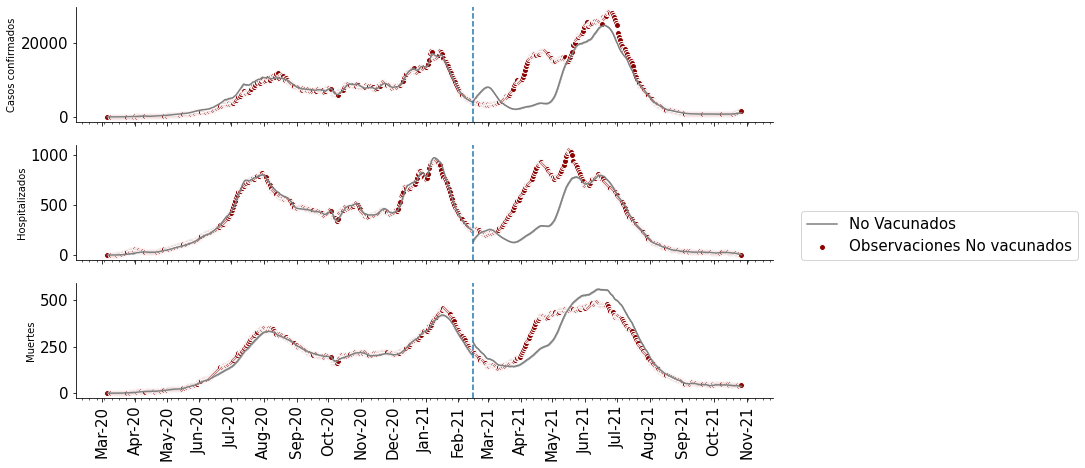

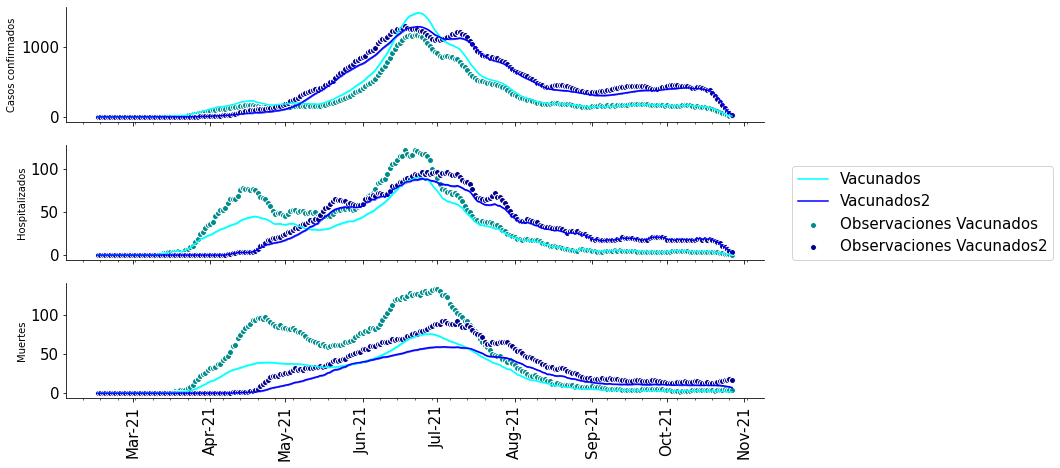

In [38]:
from matplotlib import dates as mdates
take_post     = 6

confirmed_post_time = np.squeeze(confirmed_post_all[:,:, :take_post].mean(-1))
deaths_post_time    = np.squeeze(deaths_post_all[:,:, :take_post].mean(-1))
hospitalized_post_time    = np.squeeze(hospitalized_post_all[:,:, :take_post].mean(-1))

df_confirmed  = create_df_response(confirmed_post_time, time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time, time=num_steps, dates =dates_assimilation)
df_hospitalized  = create_df_response(hospitalized_post_time, time=num_steps, dates =dates_assimilation)

confirmed_post_timeV = np.squeeze(confirmed_post_allV[:,:, :take_post].mean(-1))
deaths_post_timeV    = np.squeeze(deaths_post_allV[:,:, :take_post].mean(-1))
hospitalized_post_timeV    = np.squeeze(hospitalized_post_allV[:,:, :take_post].mean(-1))

df_confirmedV  = create_df_response(confirmed_post_timeV, time=num_stepsV, dates =dates_assimilationV)
df_deathsV     = create_df_response(deaths_post_timeV, time=num_stepsV, dates =dates_assimilationV)
df_hospitalizedV  = create_df_response(hospitalized_post_timeV, time=num_stepsV, dates =dates_assimilationV)

confirmed_post_timeVV = np.squeeze(confirmed_post_allVV[:,:, :take_post].mean(-1))
deaths_post_timeVV    = np.squeeze(deaths_post_allVV[:,:, :take_post].mean(-1))
hospitalized_post_timeVV    = np.squeeze(hospitalized_post_allVV[:,:, :take_post].mean(-1))

df_confirmedVV  = create_df_response(confirmed_post_timeVV, time=num_stepsV, dates =dates_assimilationV)
df_deathsVV     = create_df_response(deaths_post_timeVV, time=num_stepsV, dates =dates_assimilationV)
df_hospitalizedVV  = create_df_response(hospitalized_post_timeVV, time=num_stepsV, dates =dates_assimilationV)

confirmed_post_timeVV2 = np.squeeze(confirmed_post_allVV2[:,:, :take_post].mean(-1))
deaths_post_timeVV2    = np.squeeze(deaths_post_allVV2[:,:, :take_post].mean(-1))
hospitalized_post_timeVV2    = np.squeeze(hospitalized_post_allVV2[:,:, :take_post].mean(-1))

df_confirmedVV2  = create_df_response(confirmed_post_timeVV2, time=num_stepsV, dates =dates_assimilationV)
df_deathsVV2     = create_df_response(deaths_post_timeVV2, time=num_stepsV, dates =dates_assimilationV)
df_hospitalizedVV2  = create_df_response(hospitalized_post_timeVV2, time=num_stepsV, dates =dates_assimilationV)

deaths_post_timeF = deaths_post_timeV + deaths_post_timeVV + deaths_post_timeVV2

fig, ax = plt.subplots(3, 1, figsize=(12.5, 7.2), sharex=True)

ax[0].plot(df_confirmed.index.values, df_confirmed["median"], color='gray', label='No Vacunados')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3)#, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3)#, label='50% CI')
ax[0].scatter(obs_df.index.get_level_values(0), obs_df["smoothed_InfectadosNoVacunados"], edgecolors="w", facecolor="darkred", label='Observaciones No vacunados')


ax[2].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='No Vacunados')
ax[2].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3)#, label='95% CI')
ax[2].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3)#, label='50% CI')
ax[2].scatter(obs_df.index.get_level_values(0), obs_df["smoothed_MuertesNoVacunados"], edgecolors="w", facecolor="darkred", label='Observaciones No vacunados')

ax[1].plot(df_hospitalized.index.values, df_hospitalized["median"], color='gray', label='No Vacunados')
ax[1].fill_between(df_hospitalized.index.values, df_hospitalized["high_95"], df_hospitalized["low_95"], color='gray', alpha=0.3)#, label='95% CI')
ax[1].fill_between(df_hospitalized.index.values, df_hospitalized["high_50"], df_hospitalized["low_50"], color='gray', alpha=0.3)#, label='50% CI')
ax[1].scatter(obs_df.index.values, obs_df["smoothed_HospitalizadosNoVacunados"], edgecolors="w", facecolor="darkred", label='Observaciones No vacunados')
ax[1].legend(fontsize=15, loc=(1.04,0))

ax[0].plot(df_confirmedV.index.values, df_confirmedV["median"], color='gray', label='No Vacunados')
ax[0].fill_between(df_confirmedV.index.values, df_confirmedV["high_95"], df_confirmedV["low_95"], color='gray', alpha=0.3)#, label='95% CI')
ax[0].fill_between(df_confirmedV.index.values, df_confirmedV["high_50"], df_confirmedV["low_50"], color='gray', alpha=0.3)#, label='50% CI')
ax[0].scatter(obs_dfV.index.get_level_values(0), obs_dfV["smoothed_InfectadosNoVacunados"], edgecolors="w", facecolor="darkred", label='Observaciones No Vacunados')


ax[2].plot(df_deathsV.index.values, df_deathsV["median"], color='gray', label='No Vacunados')
ax[2].fill_between(df_deathsV.index.values, df_deathsV["high_95"], df_deathsV["low_95"], color='gray', alpha=0.3)#, label='95% CI')
ax[2].fill_between(df_deathsV.index.values, df_deathsV["high_50"], df_deathsV["low_50"], color='gray', alpha=0.3)#, label='50% CI')
ax[2].scatter(obs_dfV.index.get_level_values(0), obs_dfV["smoothed_MuertesNoVacunados"], edgecolors="w", facecolor="darkred", label='Observaciones No Vacunados')

ax[1].plot(df_hospitalizedV.index.values, df_hospitalizedV["median"], color='gray', label='No Vacunados')
ax[1].fill_between(df_hospitalizedV.index.values, df_hospitalizedV["high_95"], df_hospitalizedV["low_95"], color='gray', alpha=0.3)#, label='95% CI')
ax[1].fill_between(df_hospitalizedV.index.values, df_hospitalizedV["high_50"], df_hospitalizedV["low_50"], color='gray', alpha=0.3)#, label='50% CI')
ax[1].scatter(obs_dfV.index.values, obs_dfV["smoothed_HospitalizadosNoVacunados"], edgecolors="w", facecolor="darkred", label='Observaciones No Vacunados')


for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Casos confirmados", fontsize=10)
ax[2].set_ylabel("Muertes", fontsize=10)
ax[1].set_ylabel("Hospitalizados", fontsize=10)

ax[0].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
ax[1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
ax[2].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
# plt.legend(fontsize=14, loc=(1.04,0.35))
plt.show()


fig, ax = plt.subplots(3, 1, figsize=(12.5, 7.2), sharex=True)



ax[0].plot(df_confirmedVV.index.values, df_confirmedVV["median"], color='cyan', label='Vacunados')
ax[0].fill_between(df_confirmedVV.index.values, df_confirmedVV["high_95"], df_confirmedVV["low_95"], color='cyan', alpha=0.3)#, label='95% CI')
ax[0].fill_between(df_confirmedVV.index.values, df_confirmedVV["high_50"], df_confirmedVV["low_50"], color='cyan', alpha=0.3)#, label='50% CI')
ax[0].scatter(obs_dfV.index.get_level_values(0), obs_dfV["smoothed_InfectadosPrimeraDosis"], edgecolors="w", facecolor="darkcyan", label='Observaciones Vacunados')


ax[2].plot(df_deathsVV.index.values, df_deathsVV["median"], color='cyan', label='Vacunados')
ax[2].fill_between(df_deathsVV.index.values, df_deathsVV["high_95"], df_deathsVV["low_95"], color='cyan', alpha=0.3)#, label='95% CI')
ax[2].fill_between(df_deathsVV.index.values, df_deathsVV["high_50"], df_deathsVV["low_50"], color='cyan', alpha=0.3)#, label='50% CI')
ax[2].scatter(obs_dfV.index.get_level_values(0), obs_dfV["smoothed_MuertesPrimeraDosis"], edgecolors="w", facecolor="darkcyan", label='Observaciones Vacunados')

ax[1].plot(df_hospitalizedVV.index.values, df_hospitalizedVV["median"], color='cyan', label='Vacunados')
ax[1].fill_between(df_hospitalizedVV.index.values, df_hospitalizedVV["high_95"], df_hospitalizedVV["low_95"], color='cyan', alpha=0.3)#, label='95% CI')
ax[1].fill_between(df_hospitalizedVV.index.values, df_hospitalizedVV["high_50"], df_hospitalizedVV["low_50"], color='cyan', alpha=0.3)#, label='50% CI')
ax[1].scatter(obs_dfV.index.values, obs_dfV["smoothed_HospitalizadosPrimeraDosis"], edgecolors="w", facecolor="darkcyan", label='Observaciones Vacunados')


ax[0].plot(df_confirmedVV2.index.values, df_confirmedVV2["median"], color='blue', label='Vacunados2')
ax[0].fill_between(df_confirmedVV2.index.values, df_confirmedVV2["high_95"], df_confirmedVV2["low_95"], color='blue', alpha=0.3)#, label='95% CI')
ax[0].fill_between(df_confirmedVV2.index.values, df_confirmedVV2["high_50"], df_confirmedVV2["low_50"], color='blue', alpha=0.3)#, label='50% CI')
ax[0].scatter(obs_dfV.index.get_level_values(0), obs_dfV["smoothed_InfectadosEsquemaCompleto"], edgecolors="w", facecolor="darkblue", label='Observaciones Vacunados2')
# ax[0].legend(fontsize=7, loc='best')

ax[2].plot(df_deathsVV2.index.values, df_deathsVV2["median"], color='blue', label='Vacunados2')
ax[2].fill_between(df_deathsVV2.index.values, df_deathsVV2["high_95"], df_deathsVV2["low_95"], color='blue', alpha=0.3)#, label='95% CI')
ax[2].fill_between(df_deathsVV2.index.values, df_deathsVV2["high_50"], df_deathsVV2["low_50"], color='blue', alpha=0.3)#, label='50% CI')
ax[2].scatter(obs_dfV.index.get_level_values(0), obs_dfV["smoothed_MuertesEsquemaCompleto"], edgecolors="w", facecolor="darkblue", label='Observaciones Vacunados2')

ax[1].plot(df_hospitalizedVV2.index.values, df_hospitalizedVV2["median"], color='blue', label='Vacunados2')
ax[1].fill_between(df_hospitalizedVV2.index.values, df_hospitalizedVV2["high_95"], df_hospitalizedVV2["low_95"], color='blue', alpha=0.3)#, label='95% CI')
ax[1].fill_between(df_hospitalizedVV2.index.values, df_hospitalizedVV2["high_50"], df_hospitalizedVV2["low_50"], color='blue', alpha=0.3)#, label='50% CI')
ax[1].scatter(obs_dfV.index.values, obs_dfV["smoothed_HospitalizadosEsquemaCompleto"], edgecolors="w", facecolor="darkblue", label='Observaciones Vacunados2')
ax[1].legend(fontsize=15, loc=(1.04,0))

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Casos confirmados", fontsize=10)
ax[2].set_ylabel("Muertes", fontsize=10)
ax[1].set_ylabel("Hospitalizados", fontsize=10)

# ax[0].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
# ax[1].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
# ax[2].axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
plt.show()



In [38]:
df_confirmed

,mean,median,std,low_50,high_50,low_80,high_80,low_95,high_95,type
date,,,,,,,,,,
2020-03-06,1.689296,1.690002,0.012887,1.680407,1.697631,1.673664,1.704593,1.666550,1.712693,estimate
2020-03-09,1.297718,1.297897,0.012178,1.289116,1.305441,1.282955,1.313460,1.275875,1.319892,estimate
2020-03-11,2.186729,2.187275,0.018981,2.172124,2.199329,2.163319,2.209383,2.152005,2.225280,estimate
2020-03-12,3.079584,3.079908,0.026611,3.059152,3.096092,3.046153,3.114653,3.028160,3.134287,estimate
2020-03-13,4.246091,4.248534,0.037808,4.219630,4.273366,4.201916,4.296437,4.166762,4.309658,estimate
...,...,...,...,...,...,...,...,...,...,...
2021-02-10,4675.225652,4674.663472,14.629848,4665.333456,4686.199913,4656.358788,4695.474996,4649.063132,4700.273165,estimate
2021-02-11,4530.301552,4530.024726,14.563676,4521.055540,4540.546915,4512.321677,4548.695069,4501.031770,4559.606092,estimate
2021-02-12,4365.501521,4365.363389,13.885463,4356.514379,4374.350576,4348.146782,4383.315056,4340.291917,4394.169700,estimate


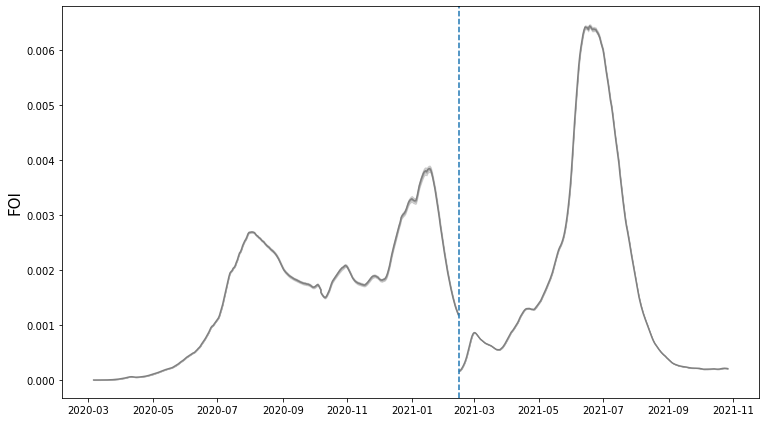

In [39]:
# foi = beta * (((Ir + sigma*Iu)+((1-V1EI)*(IV1r + sigma*IV1u))+((1-V2EI)*(IV2r + sigma*IV2u)))/ N)

# One doses vaccine efficacy in reducing infectivity
V1EI = 0.673

# Two doses vaccine efficacy in reducing infectivity
V2EI = 0.762

FOI = beta_time*((np.mean(x_post_all[2,:,:,:6], -1) + (0.5*np.mean(x_post_all[3,:,:,:6], -1)))/pop)
df_FOI = create_df_response(FOI, time=num_steps, dates =dates_assimilation)

FOIV = beta_timeV*((np.mean(x_post_allV[2,:,:,:6], -1) + (0.5*np.mean(x_post_allV[3,:,:,:6], -1))+
                    ((1-V1EI)*(np.mean(x_post_allV[11,:,:,:6], -1)+(0.5*np.mean(x_post_allV[12,:,:,:6], -1))))+
                    ((1-V2EI)*(np.mean(x_post_allV[20,:,:,:6], -1)+(0.5*np.mean(x_post_allV[21,:,:,:6], -1)))))/pop)
df_FOIV = create_df_response(FOIV, time=num_stepsV, dates =dates_assimilationV)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2), sharex=True)
ax.plot(df_FOI.index.values, df_FOI["median"], color='gray', label='No Vacunados')
ax.fill_between(df_FOI.index.values, df_FOI["high_95"], df_FOI["low_95"], color='gray', alpha=0.3)#, label='95% CI')
ax.fill_between(df_FOI.index.values, df_FOI["high_50"], df_FOI["low_50"], color='gray', alpha=0.3)#, label='50% CI')

ax.plot(df_FOIV.index.values, df_FOIV["median"], color='gray', label='Vacunados')
ax.fill_between(df_FOIV.index.values, df_FOIV["high_95"], df_FOIV["low_95"], color='gray', alpha=0.3)#, label='95% CI')
ax.fill_between(df_FOIV.index.values, df_FOIV["high_50"], df_FOIV["low_50"], color='gray', alpha=0.3)#, label='50% CI')

ax.axvline(x=pd.to_datetime('2021-02-15'), linestyle='--')
ax.set_ylabel("FOI", fontsize=15)
plt.show()

In [40]:
dates_assimilationF = obs_df.index.get_level_values(0).append(obs_dfV.index.get_level_values(0))
num_stepsF = len(datesF)

NameError: name 'datesF' is not defined

In [60]:
S_frac = np.zeros((200,344+255))
S_frac[:,:344] = S_time/pop
S_frac[:,344:] = S_Time/pop
df_SF = create_df_response(S_frac, time=num_stepsF, dates =dates_assimilationF)

B_frac = np.zeros((200,344+255))
B_frac[:,:344] = beta_time/np.amax(beta_time)
B_frac[:,344:] = beta_timeV/np.amax(beta_timeV)
df_BF = create_df_response(B_frac, time=num_stepsF, dates =dates_assimilationF)

D_frac = np.zeros((200,344+255))
D_frac[:,:344] = deaths_post_time
D_frac[:,344:] = deaths_post_timeF
df_DF = create_df_response(D_frac, time=num_stepsF, dates =dates_assimilationF)

In [71]:
df_DF['median'].values.shape

(599,)

TypeError: Input z must be 2D, not 1D

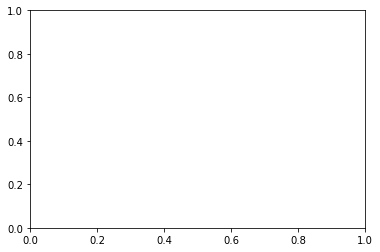

In [70]:
plt.contour(df_SF['median'].values,df_BF['median'].values,df_DF['median'].values)

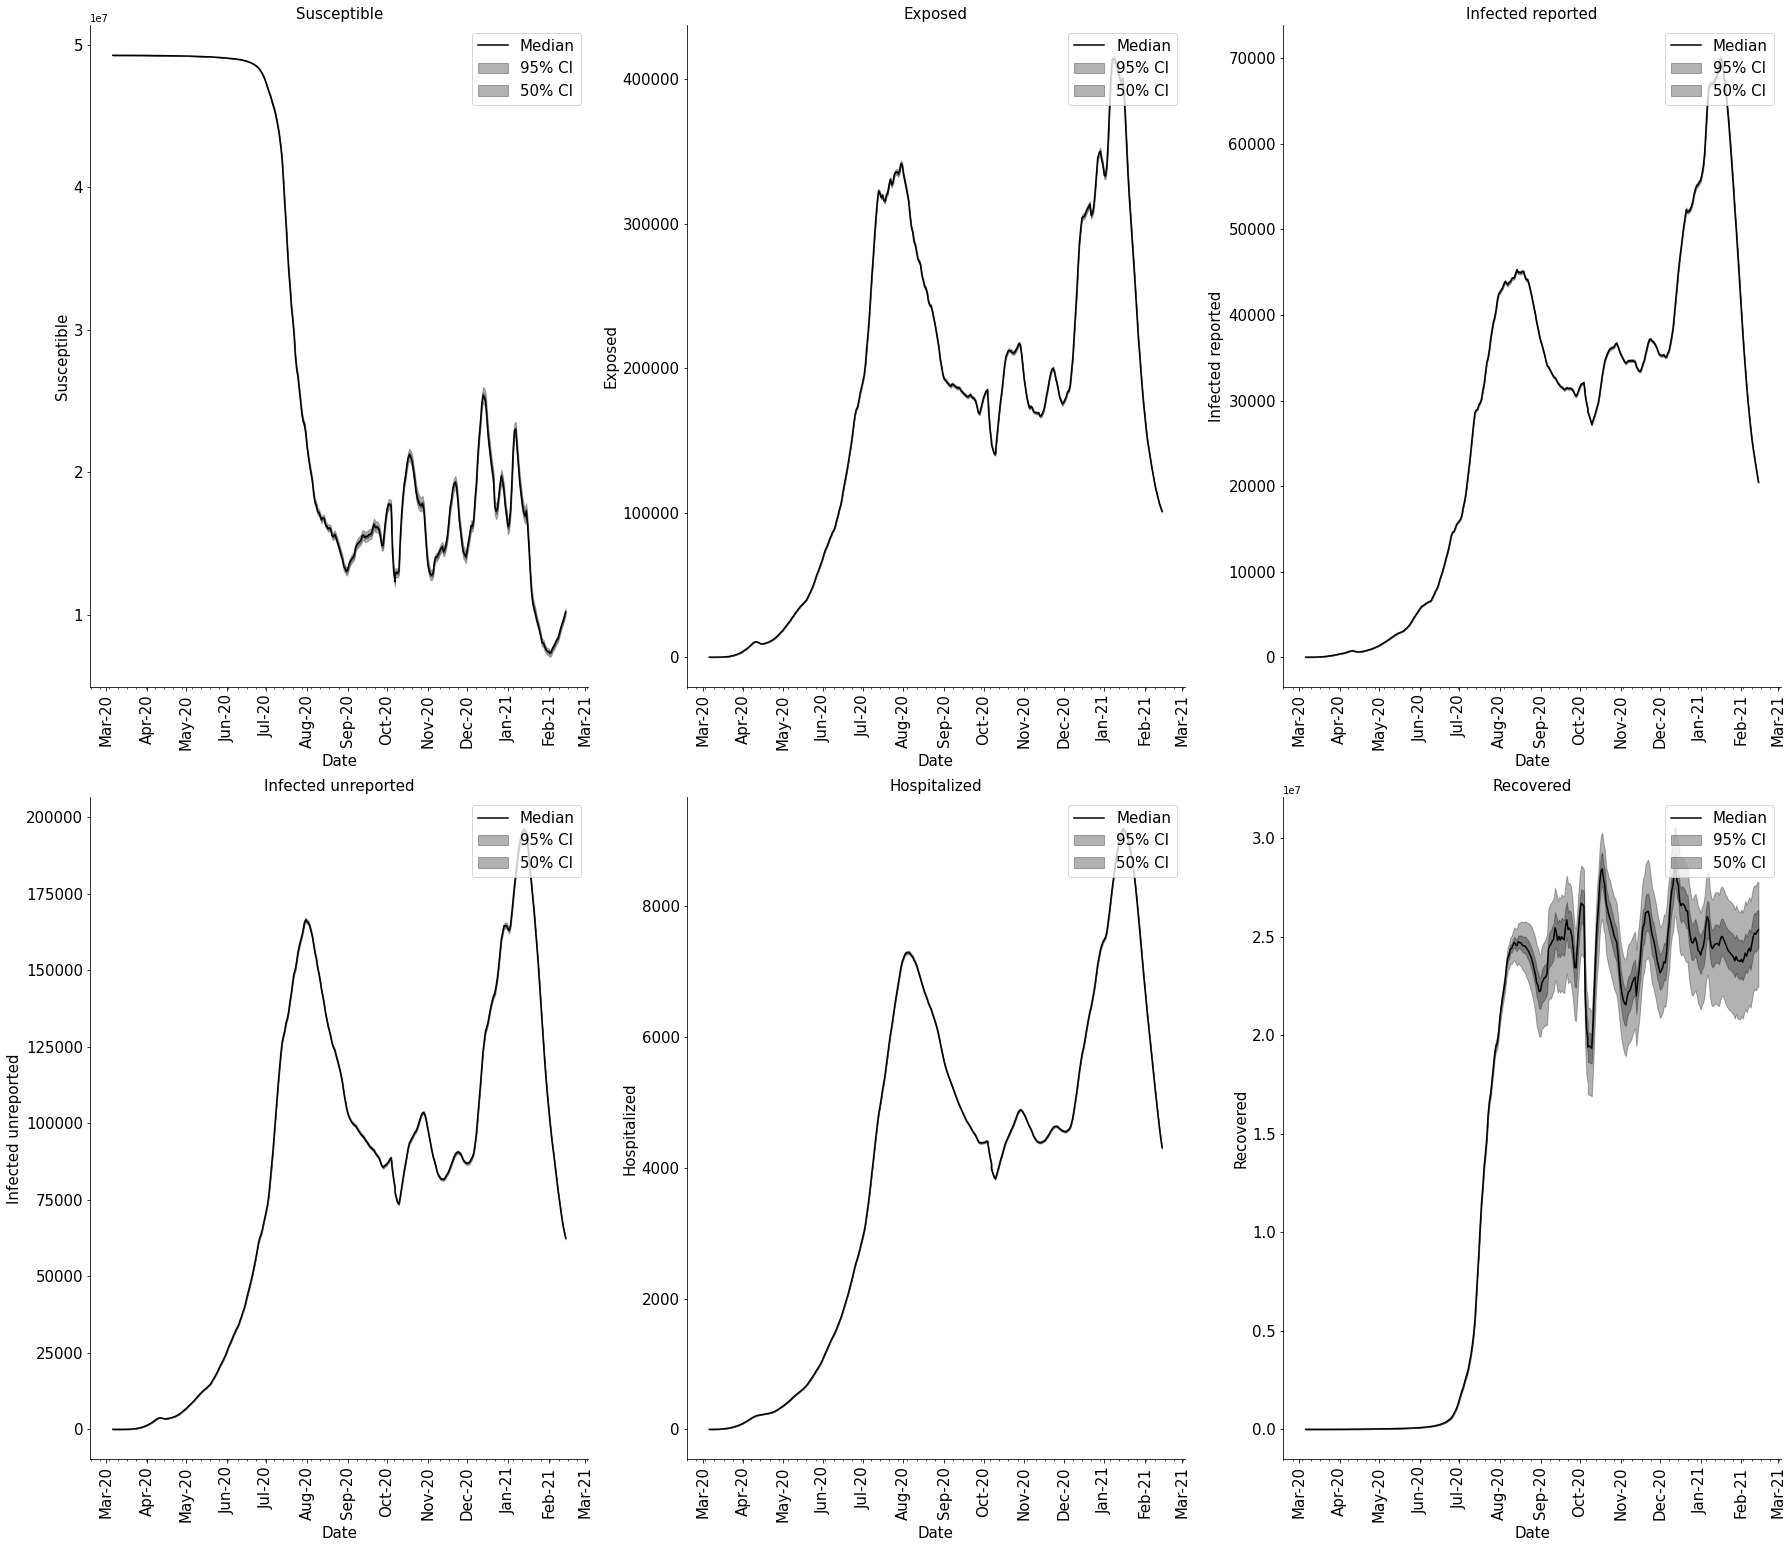

In [45]:
S_time = np.mean(x_post_all[0,:,:,:6], -1)
E_time = np.mean(x_post_all[1,:,:,:6], -1)
Ir_time = np.mean(x_post_all[2,:,:,:6], -1)
Iu_time = np.mean(x_post_all[3,:,:,:6], -1)
Ih_time = np.mean(x_post_all[4,:,:,:6], -1)
R_time = np.mean(x_post_all[5,:,:,:6], -1)
H_time = np.mean(x_post_all[6,:,:,:6], -1)
C_time = np.mean(x_post_all[7,:,:,:6], -1)
D_time = np.mean(x_post_all[8,:,:,:6], -1)

df_S  = create_df_response(S_time, time=num_steps, dates =dates_assimilation)
df_E  = create_df_response(E_time, time=num_steps, dates =dates_assimilation)
df_Ir  = create_df_response(Ir_time, time=num_steps, dates =dates_assimilation)
df_Iu  = create_df_response(Iu_time, time=num_steps, dates =dates_assimilation)
df_Ih  = create_df_response(Ih_time, time=num_steps, dates =dates_assimilation)
df_R  = create_df_response(R_time, time=num_steps, dates =dates_assimilation)
df_H  = create_df_response(H_time, time=num_steps, dates =dates_assimilation)
df_C  = create_df_response(C_time, time=num_steps, dates =dates_assimilation)
df_D  = create_df_response(D_time, time=num_steps, dates =dates_assimilation)

#---------------------------------------------------------------

fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='k', label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("Susceptible", fontsize=15)
ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='k', label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("Exposed", fontsize=15)
ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='k', label='Median')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reported", fontsize=15)
ax[0,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='k', label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreported", fontsize=15)
ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='k', label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Hospitalized", fontsize=15)
ax[1,1].set_title("Hospitalized", fontsize=15)
ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='k', label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("Recovered", fontsize=15)
ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

In [50]:
df_R

,mean,median,std,low_50,high_50,low_80,high_80,low_95,high_95,type
date,,,,,,,,,,
2020-03-06,5.167087e-01,5.181711e-01,3.236820e-02,4.947632e-01,5.367895e-01,4.747561e-01,5.557991e-01,4.534312e-01,5.758708e-01,estimate
2020-03-09,1.086971e+00,1.081899e+00,4.554171e-02,1.057835e+00,1.113775e+00,1.036318e+00,1.144058e+00,1.010433e+00,1.181845e+00,estimate
2020-03-11,1.763242e+00,1.762479e+00,5.915347e-02,1.720975e+00,1.800616e+00,1.682283e+00,1.837328e+00,1.644302e+00,1.877949e+00,estimate
2020-03-12,2.916846e+00,2.915715e+00,7.838657e-02,2.870169e+00,2.968548e+00,2.820935e+00,3.013426e+00,2.750716e+00,3.064178e+00,estimate
2020-03-13,4.975180e+00,4.982295e+00,9.751271e-02,4.917399e+00,5.029291e+00,4.854950e+00,5.086719e+00,4.764363e+00,5.196122e+00,estimate
...,...,...,...,...,...,...,...,...,...,...
2021-02-10,2.502783e+07,2.500736e+07,1.396944e+06,2.412592e+07,2.603424e+07,2.308252e+07,2.669914e+07,2.219503e+07,2.750245e+07,estimate
2021-02-11,2.518857e+07,2.518601e+07,1.384213e+06,2.427319e+07,2.622307e+07,2.326582e+07,2.682875e+07,2.236158e+07,2.761788e+07,estimate
2021-02-12,2.514245e+07,2.513139e+07,1.385969e+06,2.424340e+07,2.615570e+07,2.323276e+07,2.682141e+07,2.227361e+07,2.755001e+07,estimate


In [ ]:
100950.002884
20472.168114

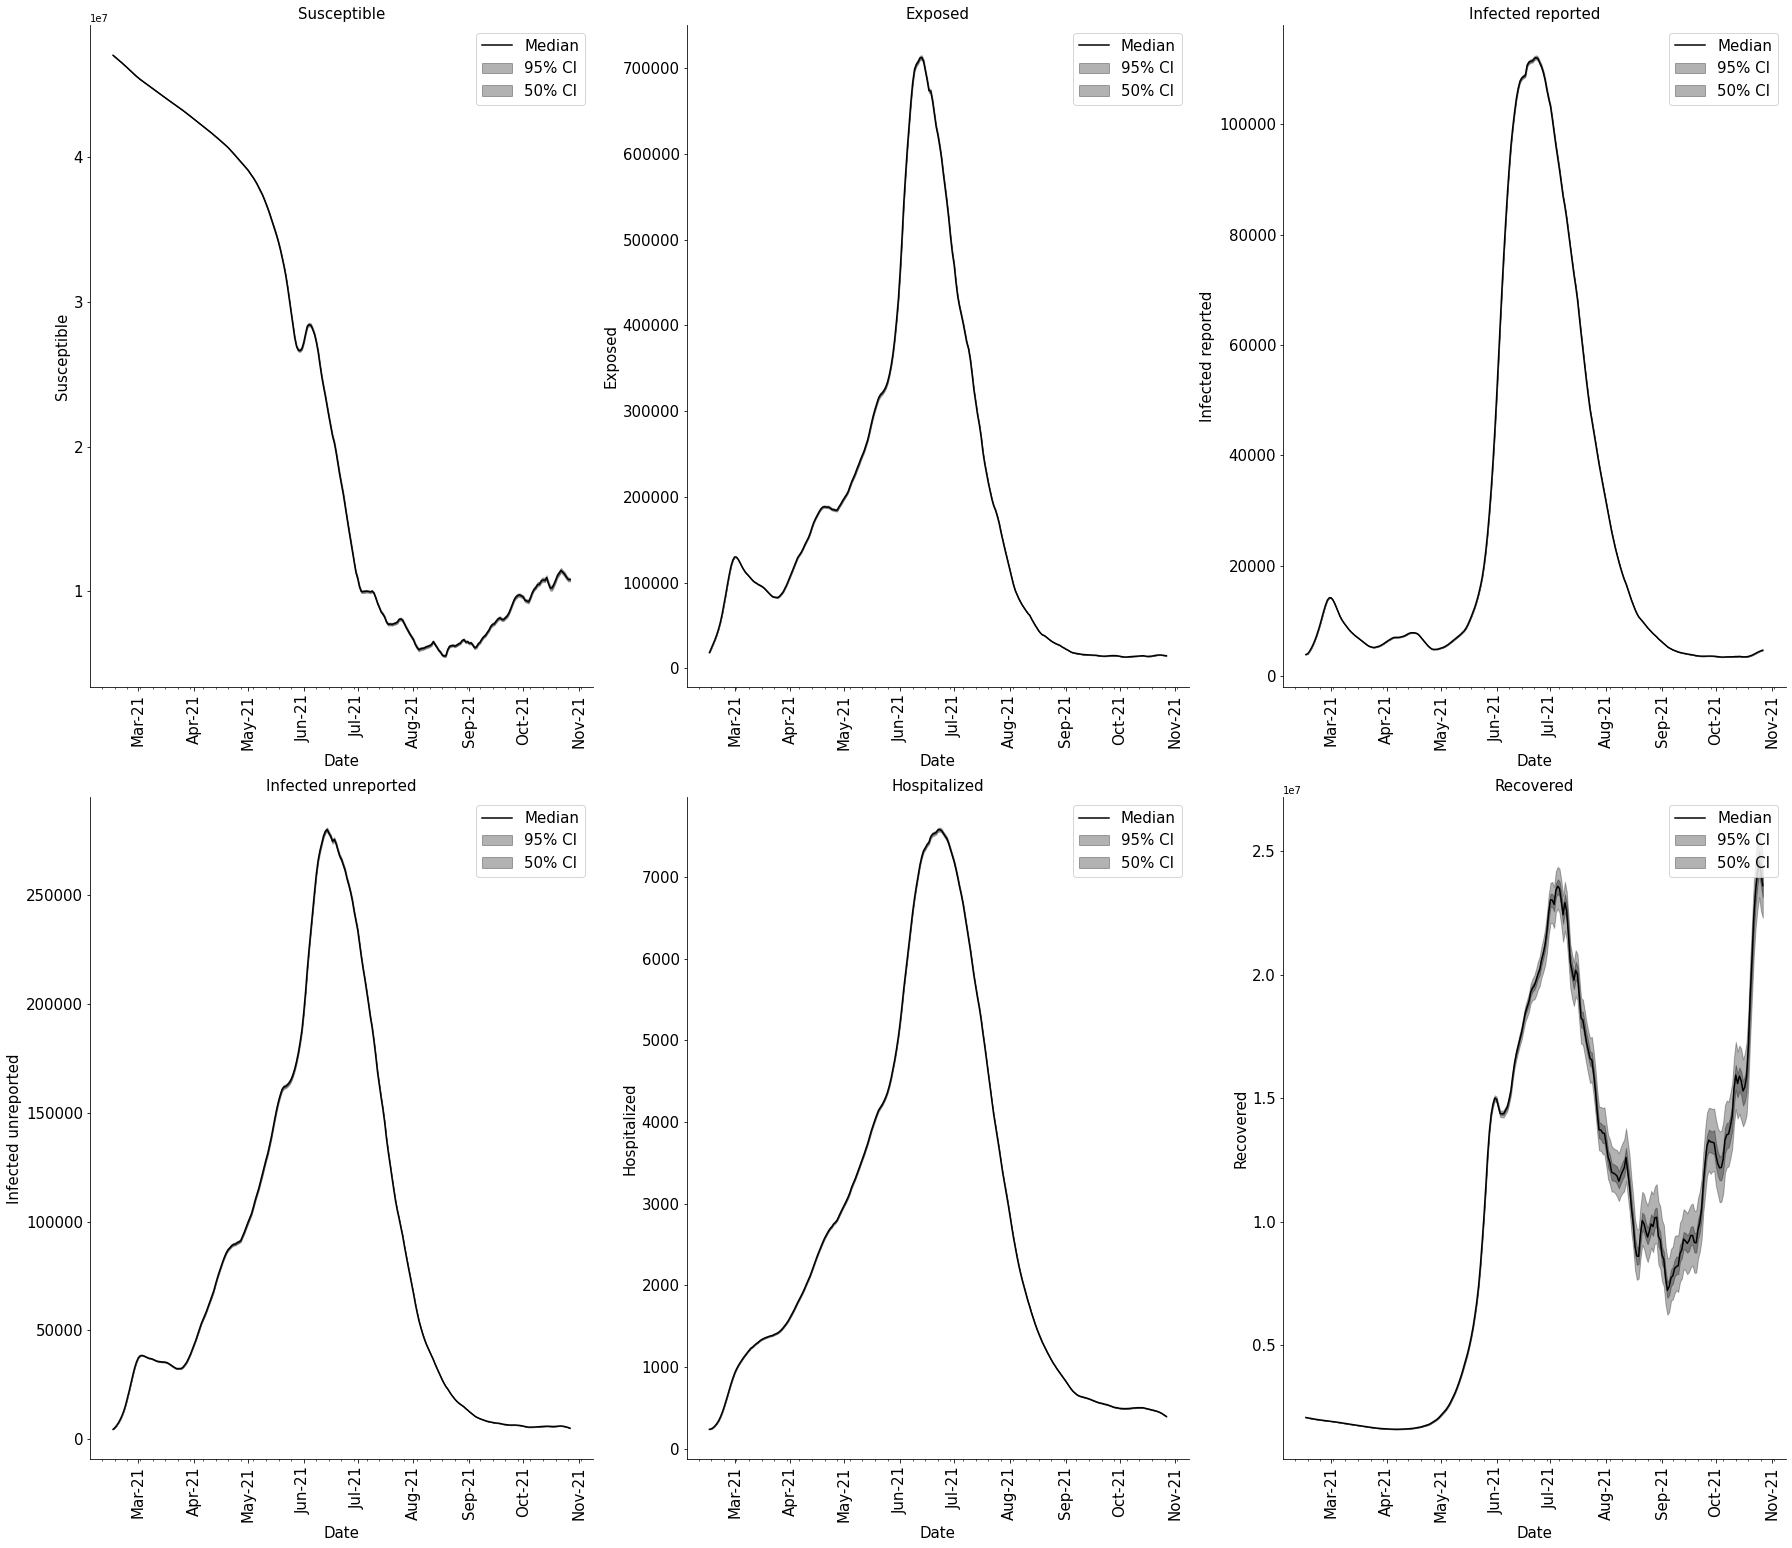

In [42]:
S_time = np.mean(x_post_allV[0,:,:,:6], -1)
E_time = np.mean(x_post_allV[1,:,:,:6], -1)
Ir_time = np.mean(x_post_allV[2,:,:,:6], -1)
Iu_time = np.mean(x_post_allV[3,:,:,:6], -1)
Ih_time = np.mean(x_post_allV[4,:,:,:6], -1)
R_time = np.mean(x_post_allV[5,:,:,:6], -1)
H_time = np.mean(x_post_allV[6,:,:,:6], -1)
C_time = np.mean(x_post_allV[7,:,:,:6], -1)
D_time = np.mean(x_post_allV[8,:,:,:6], -1)

df_S  = create_df_response(S_time, time=num_stepsV, dates =dates_assimilationV)
df_E  = create_df_response(E_time, time=num_stepsV, dates =dates_assimilationV)
df_Ir  = create_df_response(Ir_time, time=num_stepsV, dates =dates_assimilationV)
df_Iu  = create_df_response(Iu_time, time=num_stepsV, dates =dates_assimilationV)
df_Ih  = create_df_response(Ih_time, time=num_stepsV, dates =dates_assimilationV)
df_R  = create_df_response(R_time, time=num_stepsV, dates =dates_assimilationV)
df_H  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_C  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_D  = create_df_response(D_time, time=num_stepsV, dates =dates_assimilationV)

#---------------------------------------------------------------

fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='k', label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("Susceptible", fontsize=15)
ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='k', label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("Exposed", fontsize=15)
ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='k', label='Median')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reported", fontsize=15)
ax[0,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='k', label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreported", fontsize=15)
ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='k', label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Hospitalized", fontsize=15)
ax[1,1].set_title("Hospitalized", fontsize=15)
ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='k', label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("Recovered", fontsize=15)
ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

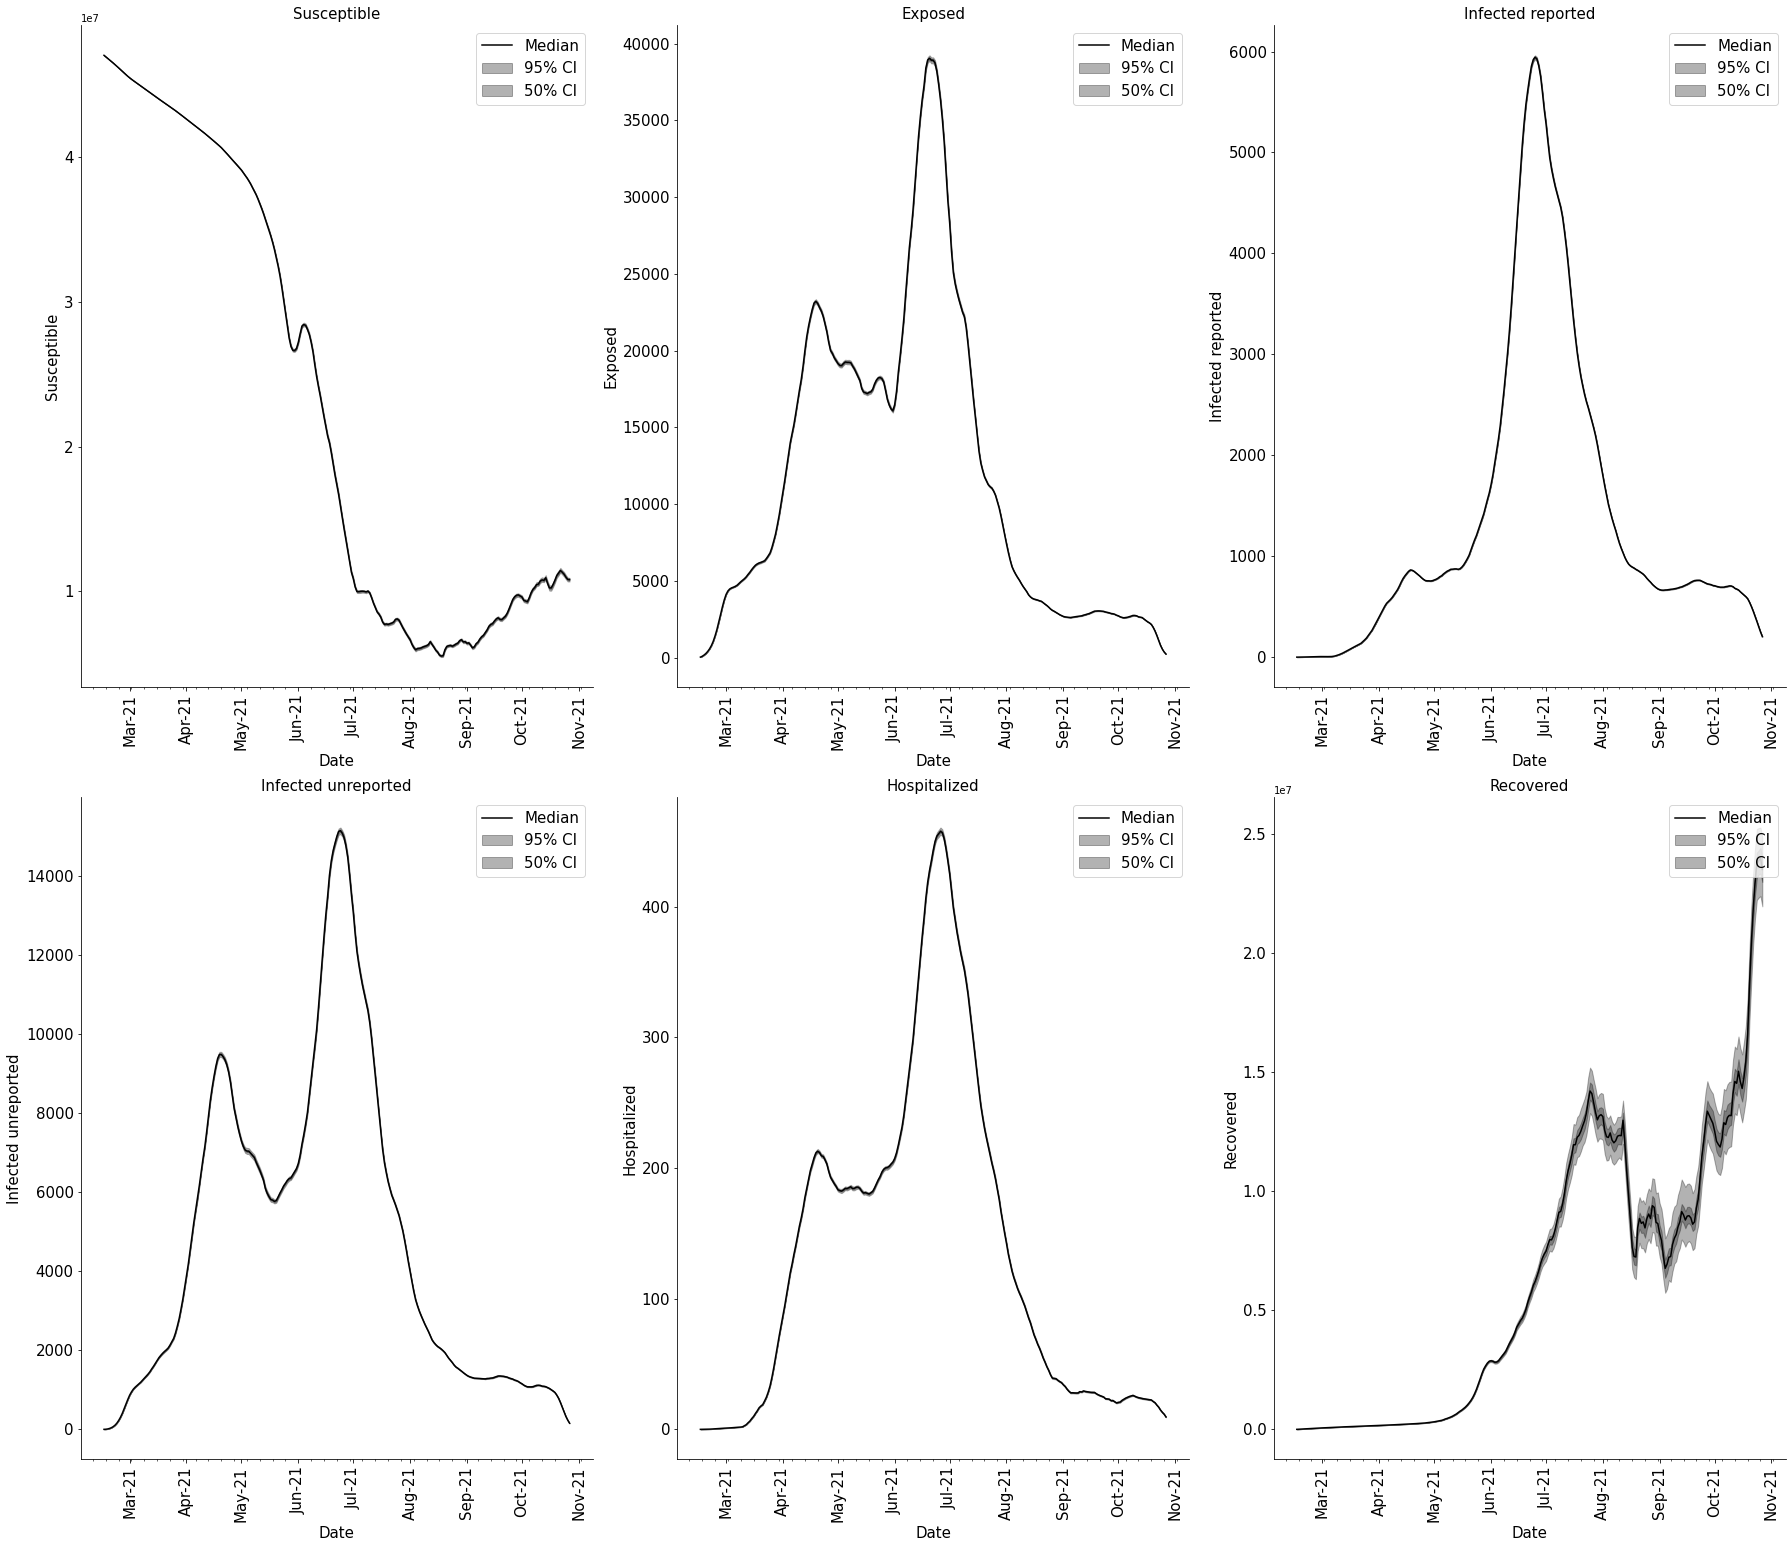

In [43]:
S_time = np.mean(x_post_allV[9,:,:,:6], -1)
E_time = np.mean(x_post_allV[10,:,:,:6], -1)
Ir_time = np.mean(x_post_allV[11,:,:,:6], -1)
Iu_time = np.mean(x_post_allV[12,:,:,:6], -1)
Ih_time = np.mean(x_post_allV[13,:,:,:6], -1)
R_time = np.mean(x_post_allV[14,:,:,:6], -1)
H_time = np.mean(x_post_allV[15,:,:,:6], -1)
C_time = np.mean(x_post_allV[16,:,:,:6], -1)
D_time = np.mean(x_post_allV[17,:,:,:6], -1)

df_SV  = create_df_response(S_time, time=num_stepsV, dates =dates_assimilationV)
df_E  = create_df_response(E_time, time=num_stepsV, dates =dates_assimilationV)
df_Ir  = create_df_response(Ir_time, time=num_stepsV, dates =dates_assimilationV)
df_Iu  = create_df_response(Iu_time, time=num_stepsV, dates =dates_assimilationV)
df_Ih  = create_df_response(Ih_time, time=num_stepsV, dates =dates_assimilationV)
df_R  = create_df_response(R_time, time=num_stepsV, dates =dates_assimilationV)
df_H  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_C  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_D  = create_df_response(D_time, time=num_stepsV, dates =dates_assimilationV)

#---------------------------------------------------------------

fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='k', label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("Susceptible", fontsize=15)
ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='k', label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("Exposed", fontsize=15)
ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='k', label='Median')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reported", fontsize=15)
ax[0,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='k', label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreported", fontsize=15)
ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='k', label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Hospitalized", fontsize=15)
ax[1,1].set_title("Hospitalized", fontsize=15)
ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='k', label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("Recovered", fontsize=15)
ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

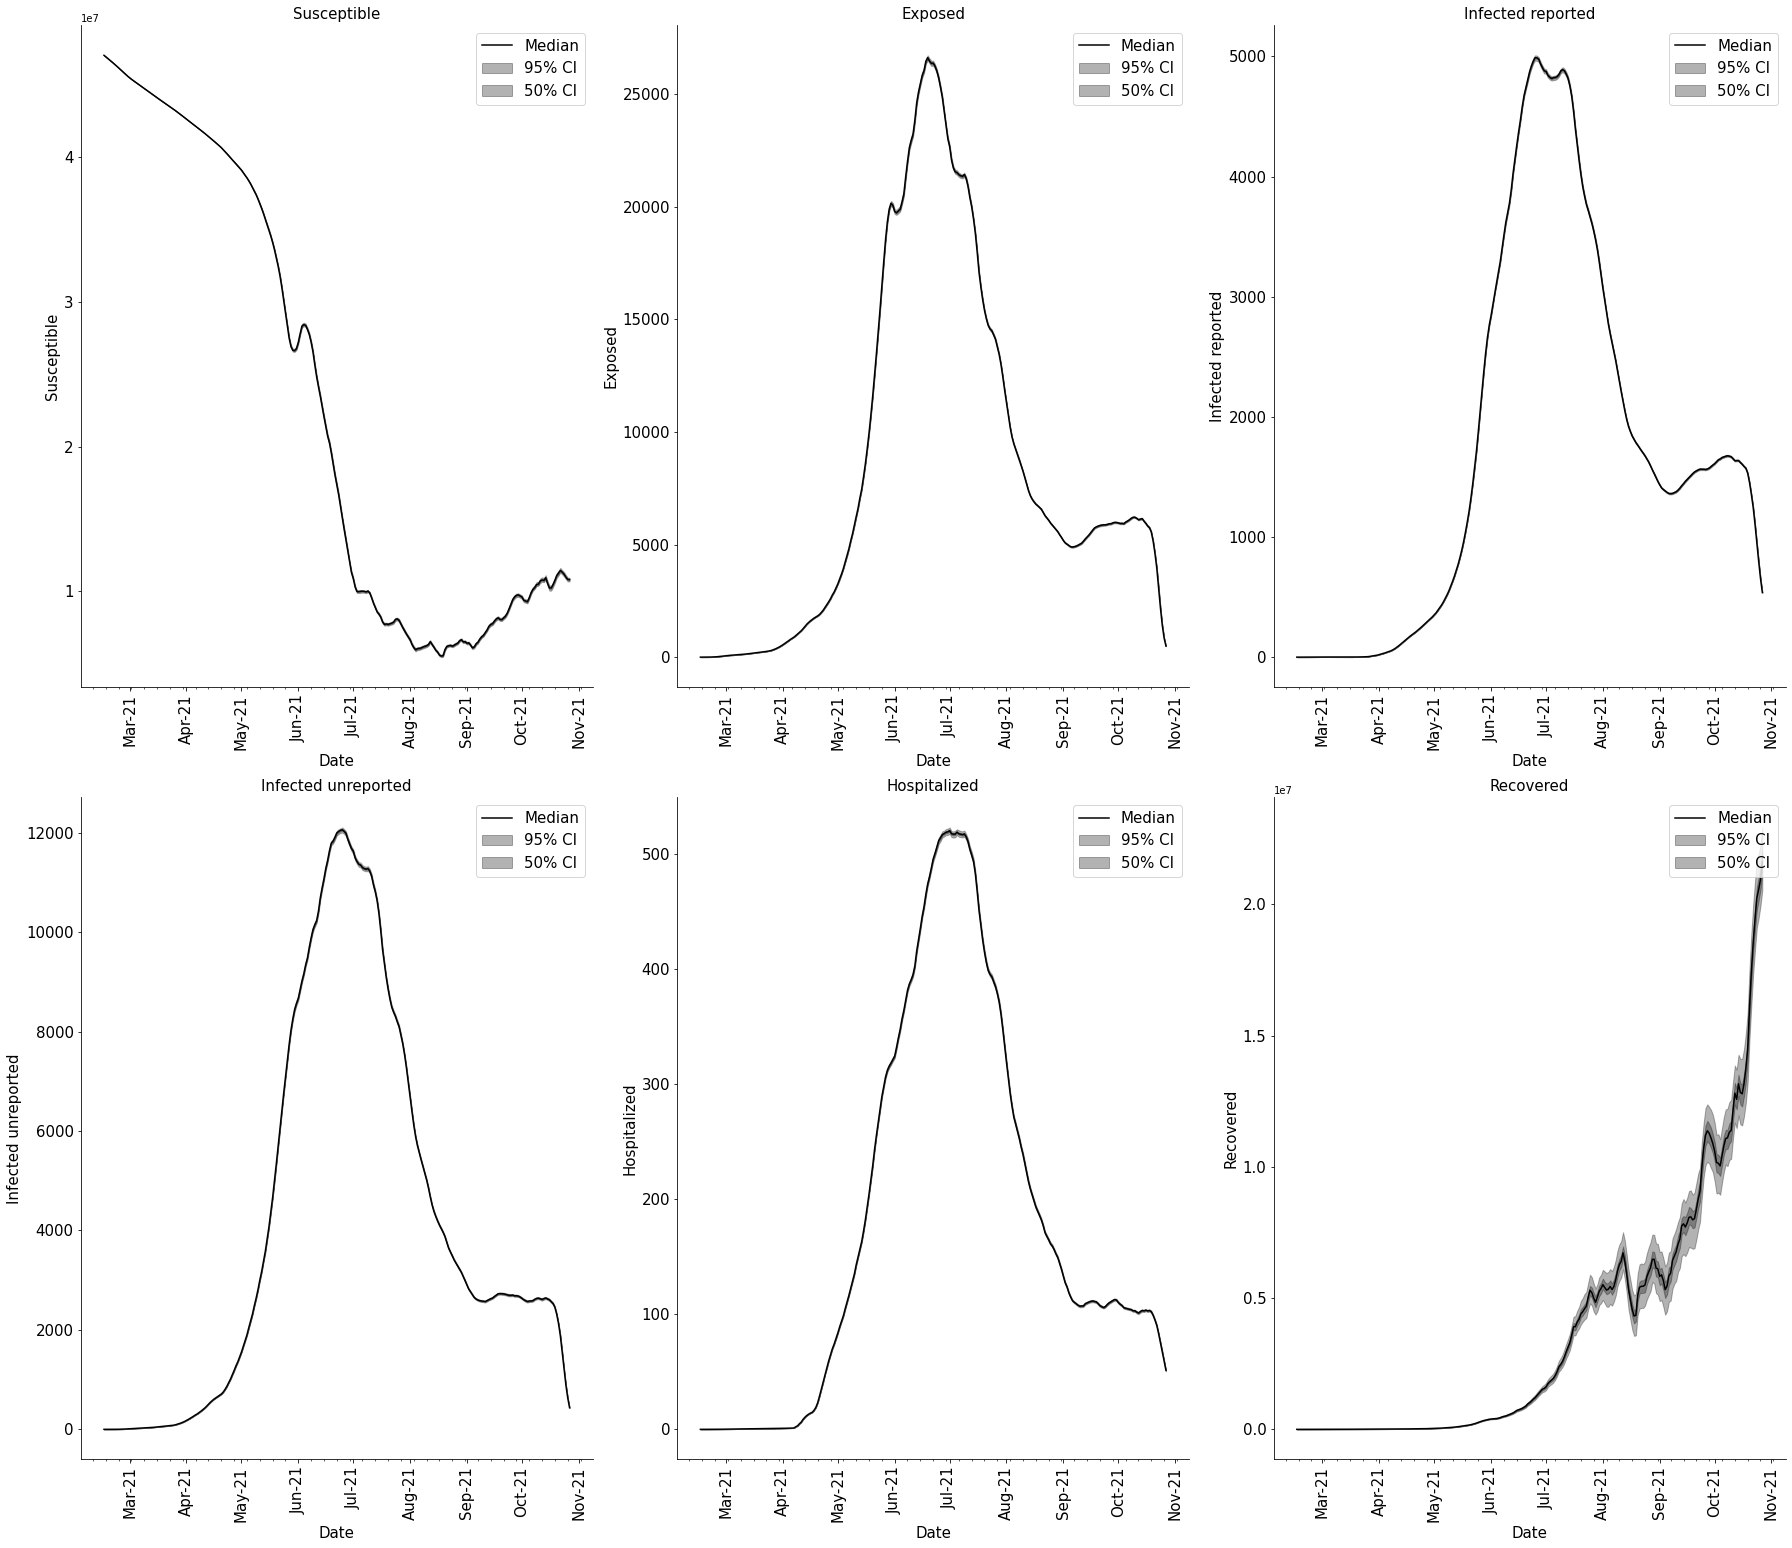

In [44]:
S_time = np.mean(x_post_allV[18,:,:,:6], -1)
E_time = np.mean(x_post_allV[19,:,:,:6], -1)
Ir_time = np.mean(x_post_allV[20,:,:,:6], -1)
Iu_time = np.mean(x_post_allV[21,:,:,:6], -1)
Ih_time = np.mean(x_post_allV[22,:,:,:6], -1)
R_time = np.mean(x_post_allV[23,:,:,:6], -1)
H_time = np.mean(x_post_allV[24,:,:,:6], -1)
C_time = np.mean(x_post_allV[25,:,:,:6], -1)
D_time = np.mean(x_post_allV[26,:,:,:6], -1)

df_SV  = create_df_response(S_time, time=num_stepsV, dates =dates_assimilationV)
df_E  = create_df_response(E_time, time=num_stepsV, dates =dates_assimilationV)
df_Ir  = create_df_response(Ir_time, time=num_stepsV, dates =dates_assimilationV)
df_Iu  = create_df_response(Iu_time, time=num_stepsV, dates =dates_assimilationV)
df_Ih  = create_df_response(Ih_time, time=num_stepsV, dates =dates_assimilationV)
df_R  = create_df_response(R_time, time=num_stepsV, dates =dates_assimilationV)
df_H  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_C  = create_df_response(C_time, time=num_stepsV, dates =dates_assimilationV)
df_D  = create_df_response(D_time, time=num_stepsV, dates =dates_assimilationV)

#---------------------------------------------------------------

fig, ax = plt.subplots(2, 3, figsize=(25, 21.6))

ax[0,0].plot(df_S.index.values, df_S["median"], color='k', label='Median')
ax[0,0].fill_between(df_S.index.values, df_S["high_95"], df_S["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,0].fill_between(df_S.index.values, df_S["high_50"], df_S["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,0].tick_params( which='both', axis='both', labelsize=15)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)

ax[0,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,0].set_xlabel("Date", fontsize=15)
ax[0,0].set_ylabel("Susceptible", fontsize=15)
ax[0,0].set_title("Susceptible", fontsize=15)
ax[0,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,1].plot(df_E.index.values, df_E["median"], color='k', label='Median')
ax[0,1].fill_between(df_E.index.values, df_E["high_95"], df_E["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,1].fill_between(df_E.index.values, df_E["high_50"], df_E["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,1].tick_params( which='both', axis='both', labelsize=15)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)

ax[0,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,1].set_xlabel("Date", fontsize=15)
ax[0,1].set_ylabel("Exposed", fontsize=15)
ax[0,1].set_title("Exposed", fontsize=15)
ax[0,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[0,2].plot(df_Ir.index.values, df_Ir["median"], color='k', label='Median')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_95"], df_Ir["low_95"], color='k', alpha=0.3, label='95% CI')
ax[0,2].fill_between(df_Ir.index.values, df_Ir["high_50"], df_Ir["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[0,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[0,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[0,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[0,2].tick_params( which='both', axis='both', labelsize=15)
ax[0,2].spines['right'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)

ax[0,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[0,2].set_xlabel("Date", fontsize=15)
ax[0,2].set_ylabel("Infected reported", fontsize=15)
ax[0,2].set_title("Infected reported", fontsize=15)
ax[0,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,0].plot(df_Iu.index.values, df_Iu["median"], color='k', label='Median')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_95"], df_Iu["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,0].fill_between(df_Iu.index.values, df_Iu["high_50"], df_Iu["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,0].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,0].tick_params( which='both', axis='both', labelsize=15)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)

ax[1,0].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,0].set_xlabel("Date", fontsize=15)
ax[1,0].set_ylabel("Infected unreported", fontsize=15)
ax[1,0].set_title("Infected unreported", fontsize=15)
ax[1,0].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,1].plot(df_Ih.index.values, df_Ih["median"], color='k', label='Median')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_95"], df_Ih["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,1].fill_between(df_Ih.index.values, df_Ih["high_50"], df_Ih["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,1].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,1].tick_params( which='both', axis='both', labelsize=15)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

ax[1,1].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,1].set_xlabel("Date", fontsize=15)
ax[1,1].set_ylabel("Hospitalized", fontsize=15)
ax[1,1].set_title("Hospitalized", fontsize=15)
ax[1,1].legend(fontsize=15, loc='upper right')
plt.tight_layout()

#---------------------------------------------------------------

ax[1,2].plot(df_R.index.values, df_R["median"], color='k', label='Median')
ax[1,2].fill_between(df_R.index.values, df_R["high_95"], df_R["low_95"], color='k', alpha=0.3, label='95% CI')
ax[1,2].fill_between(df_R.index.values, df_R["high_50"], df_R["low_50"], color='k', alpha=0.3, label='50% CI')

#sns.barplot(data=df_response, x='date', y='valuye')

ax[1,2].xaxis.set_major_locator(mdates.MonthLocator())
ax[1,2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax[1,2].xaxis.set_minor_locator(mdates.WeekdayLocator())
ax[1,2].tick_params( which='both', axis='both', labelsize=15)
ax[1,2].spines['right'].set_visible(False)
ax[1,2].spines['top'].set_visible(False)

ax[1,2].tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax[1,2].set_xlabel("Date", fontsize=15)
ax[1,2].set_ylabel("Recovered", fontsize=15)
ax[1,2].set_title("Recovered", fontsize=15)
ax[1,2].legend(fontsize=15, loc='upper right')
plt.tight_layout()

In [105]:
df_S+df_R+df_SV

,mean,median,std,low_50,high_50,low_80,high_80,low_95,high_95,type
date,,,,,,,,,,
2021-02-15,3.062279e+07,3.062279e+07,2.459888e+01,3.062278e+07,3.062281e+07,3.062276e+07,3.062283e+07,3.062275e+07,3.062284e+07,estimateestimateestimate
2021-02-16,3.062324e+07,3.062324e+07,3.453667e+01,3.062321e+07,3.062326e+07,3.062319e+07,3.062328e+07,3.062317e+07,3.062330e+07,estimateestimateestimate
2021-02-17,3.062377e+07,3.062377e+07,4.647155e+01,3.062374e+07,3.062381e+07,3.062371e+07,3.062383e+07,3.062368e+07,3.062386e+07,estimateestimateestimate
2021-02-18,3.062443e+07,3.062443e+07,5.471525e+01,3.062439e+07,3.062448e+07,3.062436e+07,3.062451e+07,3.062434e+07,3.062453e+07,estimateestimateestimate
2021-02-19,3.062519e+07,3.062519e+07,6.454269e+01,3.062514e+07,3.062524e+07,3.062511e+07,3.062527e+07,3.062508e+07,3.062531e+07,estimateestimateestimate
...,...,...,...,...,...,...,...,...,...,...
2021-10-23,5.732677e+07,5.737728e+07,1.738986e+06,5.621888e+07,5.845862e+07,5.509791e+07,5.950773e+07,5.414113e+07,6.057873e+07,estimateestimateestimate
2021-10-24,5.715249e+07,5.720500e+07,1.744503e+06,5.602342e+07,5.829331e+07,5.491561e+07,5.937015e+07,5.390780e+07,6.044867e+07,estimateestimateestimate
2021-10-25,5.662025e+07,5.668596e+07,1.753468e+06,5.547420e+07,5.775458e+07,5.437698e+07,5.881005e+07,5.338746e+07,6.000863e+07,estimateestimateestimate


In [24]:
from scipy.interpolate import UnivariateSpline
IFR_Verity = [ .00161, .00695, .0309, .0844, .161, .595, 1.93, 4.28, 7.80 ]
ifr_log    = np.log(IFR_Verity)

IFR = np.zeros((80))

ages_fit   = [9, 19, 29, 39, 49, 59, 69, 79, 89]
ifr_fitted = UnivariateSpline(ages_fit, ifr_log)

x = np.arange(0, 90, 1)
fitted_ifr = ifr_fitted(x)

ages_models = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
# Create IFR every 5 years
ifr = np.exp([fitted_ifr[0:6].mean(),fitted_ifr[6:11].mean(),fitted_ifr[11:16].mean(),fitted_ifr[16:21].mean(),
       fitted_ifr[21:26].mean(),fitted_ifr[27:31].mean(),fitted_ifr[31:36].mean(),fitted_ifr[37:41].mean(),
       fitted_ifr[41:46].mean(),fitted_ifr[47:51].mean(),fitted_ifr[51:56].mean(),fitted_ifr[56:61].mean(),
       fitted_ifr[61:66].mean(),fitted_ifr[67:71].mean(),fitted_ifr[71:76].mean(),fitted_ifr[76:].mean()])

In [25]:
ifr_age = np.exp([fitted_ifr[0:21].mean(),fitted_ifr[21:41].mean(),fitted_ifr[41:51].mean(),fitted_ifr[51:61].mean(),
       fitted_ifr[61:71].mean(),fitted_ifr[71:].mean()])/100
ifr_age

array([1.94020721e-05, 2.91537150e-04, 1.60945649e-03, 4.46947310e-03,
       1.15454911e-02, 4.10710609e-02])

In [26]:
Rt_age = np.zeros((6,200,346))
for i in range(6):
    Rt_age[i,:,:] =beta_time*(1-ifr_age[i])*(1/0.25)*(alphas_time[i,:,:]+(0.5*(1-alphas_time[i,:,:])))

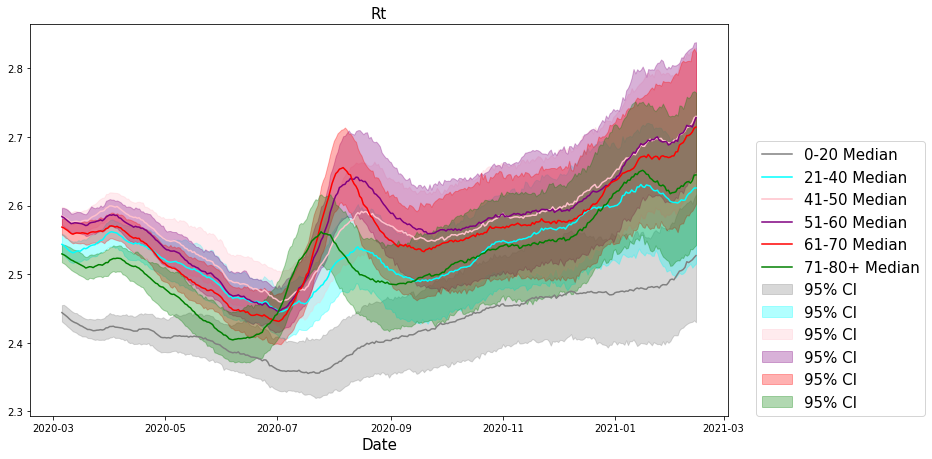

In [27]:
df_Rt0   = create_df_response(Rt_age[0,:,:], time=num_steps, dates =dates_assimilation)
df_Rt1   = create_df_response(Rt_age[1,:,:], time=num_steps, dates =dates_assimilation)
df_Rt2   = create_df_response(Rt_age[2,:,:], time=num_steps, dates =dates_assimilation)
df_Rt3   = create_df_response(Rt_age[3,:,:], time=num_steps, dates =dates_assimilation)
df_Rt4   = create_df_response(Rt_age[4,:,:], time=num_steps, dates =dates_assimilation)
df_Rt5   = create_df_response(Rt_age[5,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))

ax.plot(df_Rt0.index.values, df_Rt0["median"], color='gray', label='0-20 Median')
ax.fill_between(df_Rt0.index.values, df_Rt0["high_95"], df_Rt0["low_95"], color='gray', alpha=0.3, label='95% CI')

ax.plot(df_Rt1.index.values, df_Rt1["median"], color='cyan', label='21-40 Median')
ax.fill_between(df_Rt1.index.values, df_Rt1["high_95"], df_Rt1["low_95"], color='cyan', alpha=0.3, label='95% CI')

ax.plot(df_Rt2.index.values, df_Rt2["median"], color='pink', label='41-50 Median')
ax.fill_between(df_Rt2.index.values, df_Rt2["high_95"], df_Rt2["low_95"], color='pink', alpha=0.3, label='95% CI')

ax.plot(df_Rt3.index.values, df_Rt3["median"], color='purple', label='51-60 Median')
ax.fill_between(df_Rt3.index.values, df_Rt3["high_95"], df_Rt3["low_95"], color='purple', alpha=0.3, label='95% CI')

ax.plot(df_Rt4.index.values, df_Rt4["median"], color='red', label='61-70 Median')
ax.fill_between(df_Rt4.index.values, df_Rt4["high_95"], df_Rt4["low_95"], color='red', alpha=0.3, label='95% CI')

ax.plot(df_Rt5.index.values, df_Rt5["median"], color='green', label='71-80+ Median')
ax.fill_between(df_Rt5.index.values, df_Rt5["high_95"], df_Rt5["low_95"], color='green', alpha=0.3, label='95% CI')

ax.set_xlabel("Date", fontsize=15)
# ax.set_ylabel(r"$\alpha$", fontsize=15)
ax.set_title("Rt", fontsize=15)
ax.legend(fontsize=15, loc=(1.04,0))

# Ultima pasada por eakf

In [13]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker
from scipy.stats import truncnorm
from tqdm import tqdm

import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import math
import sys
import os

sys.path.insert(0, '..')

from functions.adjust_cases_functions import prepare_cases, smooth_1d

In [14]:
# read population
pop_dist_df = pd.read_csv(os.path.join('data/population.csv'))
bog_pop_df = pop_dist_df[pop_dist_df["poly_id"]==11001].dropna()
pop        = bog_pop_df["attr_pop"]

# read contact matrices
ages_keys =["1-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40",
            "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80+"]

contact_matrices_df = pd.read_excel(os.path.join("contact_matrices/MUestimates_all_locations_1.xlsx"), sheet_name="Colombia")
contact_matrices_df = contact_matrices_df.rename(columns={k: ages_keys[idx] for idx, k in enumerate(contact_matrices_df.keys()) })
contact_matrices_df.index = ages_keys
contact_matrices_df = contact_matrices_df.loc[np.flip(ages_keys)]
Cij = contact_matrices_df.loc[ages_keys].T
Cij = Cij.to_numpy()

# normalize contact matrix
for age_idx in range(Cij.shape[0]):
    Cij[age_idx,:] = Cij[age_idx,:] / np.sum(Cij[age_idx,:])

# read cases by age without filtering
# previously group them in the ages of interest.
age_cases_df     = pd.read_csv(os.path.join('data/cases_ages_grouped.csv'), parse_dates=["date_time"]).rename(columns={"date_time": "date", "num_cases": "confirmed", "num_diseased": "deaths"})
bog_age_cases_df = age_cases_df[age_cases_df.poly_id==11001][["age_group", "date", "confirmed", "deaths"]]
bog_cases_df     = bog_age_cases_df.set_index(["age_group", "date"])#bog_age_cases_df[bog_age_cases_df["age_group"]=="agg"].set_index(["age_group", "date"])
bog_cases_df1     = bog_cases_df.unstack([0]).resample('1D').sum().stack().reset_index() # Resample cases at weekly (sunday)

dates_inference = bog_cases_df1["date"].unique()

dict_map = {'0-20': (0, 20), '21-40': (21, 40), '41-50': (41, 50),
           '51-60': (51, 60), '61-70': (60, 69), '71-80+': (71, 200)}

bog_smoothed_df = []
for i in dict_map.keys():
    bog_cases_df =  prepare_cases(bog_cases_df1[bog_cases_df1['age_group']==i], col="confirmed")
    bog_cases_df =  prepare_cases(bog_cases_df[bog_cases_df['age_group']==i], col="deaths")
    bog_smoothed_df.append(bog_cases_df)

bog_smoothed_df = pd.concat(bog_smoothed_df)

C:\Users\Windows\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Windows\OneDrive - Universidad de los Andes\X Semestre\Covid\Covid19_Age\functions\adjust_cases_functions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_cases[out_col] = daily_cases[col].rolling(window=7,
C:\Users\Windows\OneDrive - Universidad de los Andes\X Semestre\Covid\Covid19_Age\functions\adjust_cases_functions.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [15]:
from scipy.interpolate import UnivariateSpline
IFR_Verity = [ .00161, .00695, .0309, .0844, .161, .595, 1.93, 4.28, 7.80 ]
ifr_log    = np.log(IFR_Verity)

IFR = np.zeros((80))

ages_fit   = [9, 19, 29, 39, 49, 59, 69, 79, 89]
ifr_fitted = UnivariateSpline(ages_fit, ifr_log)

x = np.arange(0, 90, 1)
fitted_ifr = ifr_fitted(x)

ages_models = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
# Create IFR every 5 years
ifr = np.exp([fitted_ifr[0:6].mean(),fitted_ifr[6:11].mean(),fitted_ifr[11:16].mean(),fitted_ifr[16:21].mean(),
       fitted_ifr[21:26].mean(),fitted_ifr[27:31].mean(),fitted_ifr[31:36].mean(),fitted_ifr[37:41].mean(),
       fitted_ifr[41:46].mean(),fitted_ifr[47:51].mean(),fitted_ifr[51:56].mean(),fitted_ifr[56:61].mean(),
       fitted_ifr[61:66].mean(),fitted_ifr[67:71].mean(),fitted_ifr[71:76].mean(),fitted_ifr[76:].mean()])/100 #%

In [16]:
priors_range_dict  = {}
priors_range_dict["beta"]  = [0.8, 1.5]        # Contact rate range
priors_range_dict["alpha"] = [0.01, 1]         # Report rate range [1% - 100%]

dict_map = {'0-20': (0, 20), '21-40': (21, 40), '41-50': (41, 50),
           '51-60': (51, 60), '61-70': (60, 69), '71-80+': (71, 200)}

date_init  = pd.to_datetime("2020-03-06")
date_end   = pd.to_datetime("2021-02-14")

dates_week = pd.date_range(start=date_init, end=date_end, freq='1D')
dates      = pd.date_range(start=date_init, end=dates_week[-1], freq='1D')

num_steps = len(dates_week)

lambda_inf    = 1.1
num_iters_mif = 350
alpha_mif     = 0.9 # Variance shrinking factor
num_ensembles = 200
num_age_groups_t = len(ages_keys) # number of total groups
num_age_groups_i = len(dict_map) # number of interest groups

obs_df = bog_smoothed_df
obs_df = obs_df[obs_df["date"].isin(dates)]      # keep only in defined dates
obs_df = obs_df.set_index(["date", "age_group"])

# resample weekly and by age group
obs_w_df = obs_df.groupby([pd.Grouper(level='date', freq='W-Sun'),pd.Grouper(level='age_group')]).sum()

oev_df         = pd.DataFrame(columns=["date", "age_group", "OEV_confirmed", "OEV_deaths"])
oev_df["date"] = obs_df.index.get_level_values(0)
oev_df["age_group"] = obs_df.index.get_level_values(1)
oev_df         = oev_df.set_index(["date", 'age_group'])
oev_df["OEV_confirmed"] = np.maximum(1e-4, obs_df["confirmed"].values**2/100 )
oev_df["OEV_deaths"]    = np.maximum(25, obs_df["deaths"].values**2/100 )


oev_w_df         = pd.DataFrame(columns=["date", "age_group", "OEV_confirmed", "OEV_deaths"])
oev_w_df["date"] = obs_w_df.index.get_level_values(0)
oev_w_df["age_group"] = obs_w_df.index.get_level_values(1)
oev_w_df         = oev_w_df.set_index(["date", 'age_group'])
oev_w_df["OEV_confirmed"] = np.maximum(1e-4, obs_w_df["confirmed"].values**2/100 )
oev_w_df["OEV_deaths"]    = np.maximum(25*7, obs_w_df["deaths"].values**2/100 )

######## INFERENCE  SETTINGS ########
# Range of parameters
beta_prior_dict       = {"beta": priors_range_dict["beta"]}
param_range_beta = np.array([v for k, v in beta_prior_dict.items()])
std_param_beta   = param_range_beta[:,1]-param_range_beta[:,0]
SIG_beta         = std_param_beta ** 2 / 4; #  initial covariance of parameters

alpha_prior_dict       = {f"alpha_{idx_age}": priors_range_dict["alpha"] for idx_age in range(num_age_groups_i)}
param_range_alpha = np.array([v for k, v in alpha_prior_dict.items()])
std_param_alpha   = param_range_alpha[:,1]-param_range_alpha[:,0]
SIG_alpha         = std_param_alpha ** 2 / 4; #  initial covariance of parameters

In [17]:
def eakf_step_age(x_prior, beta_prior, alpha_prior, obs_ens_time, obs_time, oev_time, num_var=8):
    # beta_prior: Prior with the contact rate. Shape [1, num_ensembles]
    # alpha_prior: Prior with the report rates. Shape [num_ages, num_ensembles]
#x_prior, beta_prior, alpha_prior, obs_ens_time, obs_time, oev_time = x_age, beta_post, alpha_post, np.squeeze(deaths_t), deaths_time, oev_deaths_time

    prior_mean_ct = obs_ens_time.mean(-1)
    prior_var_ct  = obs_ens_time.var(-1)

    # Correct degenerate prior
    idx_degenerate_prior = np.where(prior_var_ct==0)[0]
    prior_var_ct[idx_degenerate_prior] = 1e-3

    post_var_ct  = prior_var_ct * oev_time / (prior_var_ct + oev_time)
    post_mean_ct = post_var_ct * (prior_mean_ct/prior_var_ct + obs_time / oev_time)
    alpha        = oev_time / (oev_time+prior_var_ct); alpha = alpha**0.5
    dy           = np.array([post_mean_ct[i] + alpha[i]*(obs_ens_time[i,:]-prior_mean_ct[i]) - obs_ens_time[i,:] for i in range(len(prior_mean_ct))])

    # adjust ascertainment rates (alpha)
    rr_age = []
    for idx_a in range(len(prior_mean_ct)):
        rr = []
        for idx_o in range(len(prior_mean_ct)):
            A = np.cov(alpha_prior[idx_a,:], obs_ens_time[idx_o,:])
            rr.append( A[1,0] / prior_var_ct[idx_o] )
        rr_age.append(rr)

    rr         = np.array(rr_age)
    dx = []
    for idx_age in range(len(prior_mean_ct)):
        dx.append(np.array([np.dot( np.expand_dims(rr[idx_age,idx_obs],-1), np.expand_dims(dy[idx_obs,:], 0)) for idx_obs in range(len(prior_mean_ct))]))

    dx = np.array(dx)
    dx = dx.mean(1) # Average over the observation space (num_ages)

    alpha_post = np.array([alpha_prior[i,:] + dx[i,:] for i in range(len(prior_mean_ct))])

    # adjust contact rate (beta)
    rr = []
    #for idx_p, p in enumerate(dict_params_range.keys()):
    for idx_o in range(len(prior_mean_ct)):
        A = np.cov(beta_prior[0,:], obs_ens_time[idx_o,:])
        rr.append( A[1,0] / prior_var_ct[idx_o] )
    rr         = np.array(rr)

    dx = np.array([np.dot( np.expand_dims(rr[idx_obs],-1), np.expand_dims(dy[idx_obs,:], 0)) for idx_obs in range(len(prior_mean_ct))])
    dx = np.array(dx)
    dx = dx.mean(0) # Average over the observation space (num_ages)
    beta_post = beta_prior + dx

    # adjust variables
    rr_age = []
    for idx_a in range(x_prior.shape[0]):
        rr = []
        for idx_var in range(num_var):
            rr_o = []
            for idx_o in range(len(prior_mean_ct)):
                A = np.cov(x_prior[idx_a,idx_var,:], obs_ens_time[idx_o,:])
                rr_o.append( A[1,0] / prior_var_ct[idx_o] )
            rr.append(rr_o)
        rr_age.append(rr)
    rr       = np.array(rr_age)

    dx = []
    for i in range(x_prior.shape[0]):
        dx.append(np.array([np.dot( np.expand_dims(rr[i,:,j],-1), np.expand_dims(dy[j,:], 0)) for j in range(len(prior_mean_ct))]))
    dx = np.array(dx)

    dx = dx.mean(1)
    x_post   = x_prior + dx

    obs_post    = obs_ens_time + dy

    return x_post, beta_post, alpha_post, obs_post

def checkbound_state_vars_jaime(x, pop):
    x = np.clip(x, 0, np.expand_dims(np.array([pop.values]).T, -1) )
    return x

In [32]:
deaths_post_time = np.zeros_like(deaths_post_time)
cases_post_time  = np.zeros_like(confirmed_post_time)
alpha_post_time  = np.zeros_like(alphas_time)
beta_post_time   = np.zeros_like(beta_time)
x_post_time      = np.zeros_like(x_time)

In [39]:
from models.utils_eakf import inflate_ensembles_age, checkbound_params_age, checkbound_state_vars_age, inflate_ensembles_age_prior, inflate_ensembles, checkbound_params
from models.models_pomp import age_SEIIRD_model, init_age_model
from models.utils_inference import sample_params_uniform_age, get_truncated_normal, sample_params_normal, sample_params_uniform

col_obs_cases  = "smoothed_confirmed"
col_obs_deaths = "smoothed_deaths"

confirmed_t = np.zeros((num_age_groups_i, num_ensembles, 1))
deaths_t    = np.zeros((num_age_groups_i, num_ensembles, 1))
x = init_age_model(pop=pop.to_list(), num_ensembles=num_ensembles, num_age_groups=num_age_groups_t)
for idx_t, date in enumerate(dates):

    # Inflate beta variance
    beta_prior = beta_time[:,:,idx_t]
#     params_var_beta   = SIG_beta * (alpha_mif**350)**2
    beta_prior = sample_params_normal(beta_prior_dict, np.mean(beta_prior,-1), np.std(beta_prior,-1)**2, num_ensembles=num_ensembles)

    # Inflate alpha variance
    alpha_prior = alphas_time[:,:,idx_t]
#     params_var_alpha  = SIG_alpha * (alpha_mif**350)**2
    alpha_prior      = sample_params_normal(alpha_prior_dict, np.mean(alpha_prior,-1), np.std(alpha_prior,-1)**2, num_ensembles=num_ensembles)

#     x = x_time[:,:,:,idx_t]
    
    
#     x = inflate_ensembles_age(x, inflation_value=lambda_inf, num_ensembles=num_ensembles, num_age_groups=num_age_groups_t)
    x = checkbound_state_vars_jaime(x, pop)

    # Inflate beta variance
#     beta_prior = inflate_ensembles(beta_prior, inflation_value=lambda_inf, num_ensembles=num_ensembles)
    beta_prior = checkbound_params(beta_prior_dict, beta_prior, num_ensembles=num_ensembles)

    # Inflate alpha variance
#     alpha_prior = inflate_ensembles(alpha_prior, inflation_value=lambda_inf, num_ensembles=num_ensembles)
    alpha_prior = checkbound_params(alpha_prior_dict, alpha_prior, num_ensembles=num_ensembles)


    x_ens =[]

    for idx_ens in range(num_ensembles):

        beta  = beta_prior[:, idx_ens]

        alpha = np.array([alpha_prior[0,idx_ens], alpha_prior[0,idx_ens], alpha_prior[0,idx_ens], alpha_prior[0,idx_ens],
                          alpha_prior[1,idx_ens], alpha_prior[1,idx_ens], alpha_prior[1,idx_ens], alpha_prior[1,idx_ens],
                          alpha_prior[2,idx_ens], alpha_prior[2,idx_ens], alpha_prior[3,idx_ens], alpha_prior[3,idx_ens],
                          alpha_prior[4,idx_ens], alpha_prior[4,idx_ens], alpha_prior[5,idx_ens], alpha_prior[5,idx_ens]])
        # The model is run with the total age groups.

        x_ens.append(age_SEIIRD_model(x[:,:,idx_ens], age_contact_matrix=Cij, beta=beta,
                                      ifr_s=ifr, alpha_s=alpha, pop_pyramid=pop.to_list(),
                                      num_age_groups=num_age_groups_t))

    x_ens = np.array(x_ens).T
    x_age = x_ens


    # It is grouped into the age groups of interest
    x_age_i = np.zeros((num_age_groups_i, 8, num_ensembles))

    # Sum all variable for each age group
    x_age_i[0,:,:] = np.sum(x_ens[:4,:,:], axis=0)
    x_age_i[1,:,:] = np.sum(x_ens[4:8,:,:], axis=0)
    x_age_i[2,:,:] = np.sum(x_ens[8:10,:,:], axis=0)
    x_age_i[3,:,:] = np.sum(x_ens[10:12,:,:], axis=0)
    x_age_i[4,:,:] = np.sum(x_ens[12:14,:,:], axis=0)
    x_age_i[5,:,:] = np.sum(x_ens[14:16,:,:], axis=0)

    confirmed_t  +=  np.expand_dims(x_age_i[:,-2,:], -1)
    deaths_t     +=  np.expand_dims(x_age_i[:,-1,:], -1)

    # Since the age groups are an index, the arrangement of the age groups remains.
    oev_confirmed_time = oev_df.loc[date]["OEV_confirmed"]
    oev_deaths_time    = oev_df.loc[date]["OEV_deaths"]

    confirmed_time = obs_df.loc[date][col_obs_cases]
    deaths_time    = obs_df.loc[date][col_obs_deaths]

    beta_post  = beta_prior.copy()
    alpha_post = alpha_prior.copy()

    # Update parameters using confirmed deaths
    x_post, beta_post, alpha_post, deaths_obs_post = eakf_step_age(x_age, beta_post, alpha_post, np.squeeze(deaths_t), deaths_time, oev_deaths_time)
    x_post                                         = checkbound_state_vars_jaime(x_post, pop)
    beta_post                                      = checkbound_params(beta_prior_dict, beta_post, num_ensembles=num_ensembles)
    alpha_post                                     = checkbound_params(alpha_prior_dict, alpha_post, num_ensembles=num_ensembles)

    # Update parameters using confirmed cases
    x_post, beta_post, alpha_post, confirmed_obs_post = eakf_step_age(x_post, beta_post, alpha_post, np.squeeze(confirmed_t), confirmed_time, oev_confirmed_time)
    x_post                                            = checkbound_state_vars_jaime(x_post, pop)
    beta_post                                         = checkbound_params(beta_prior_dict, beta_post, num_ensembles=num_ensembles)
    alpha_post                                        = checkbound_params(alpha_prior_dict, alpha_post, num_ensembles=num_ensembles)
    
    x = x_post.copy()

    deaths_post_time[:,:,idx_t] = deaths_obs_post
    cases_post_time[:,:,idx_t]  = confirmed_obs_post
    alpha_post_time[:,:,idx_t]  = alpha_post
    beta_post_time[:,:,idx_t]   = beta_post
    x_post_time[:,:,:,idx_t]    = x_post

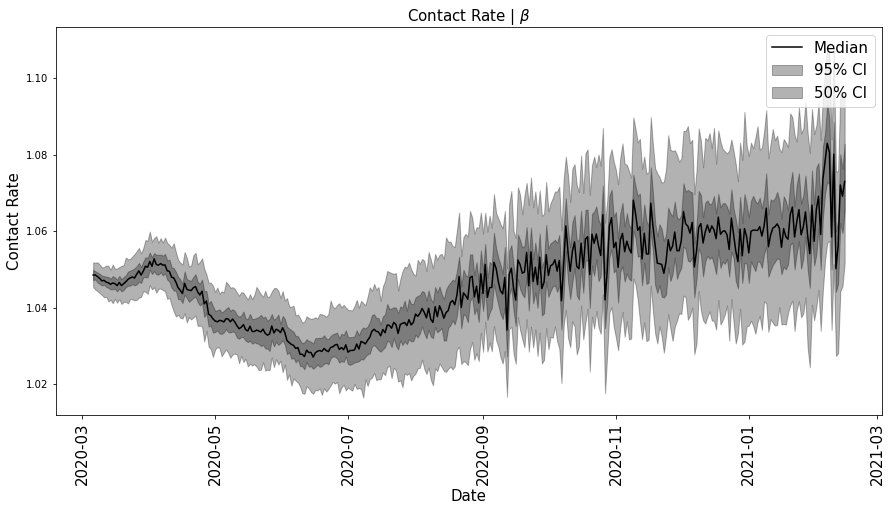

In [40]:
df_beta  = create_df_response(beta_post_time[0,:,:], time=num_steps, dates =dates_assimilation)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))
ax.plot(df_beta.index.values, df_beta["median"], color='k', label='Median')
ax.fill_between(df_beta.index.values, df_beta["high_95"], df_beta["low_95"], color='k', alpha=0.3, label='95% CI')
ax.fill_between(df_beta.index.values, df_beta["high_50"], df_beta["low_50"], color='k', alpha=0.3, label='50% CI')

ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Contact Rate", fontsize=15)
ax.set_title(r"Contact Rate | $\beta$ ", fontsize=15)
ax.legend(fontsize=15, loc='upper right')
plt.tight_layout()
plt.show()

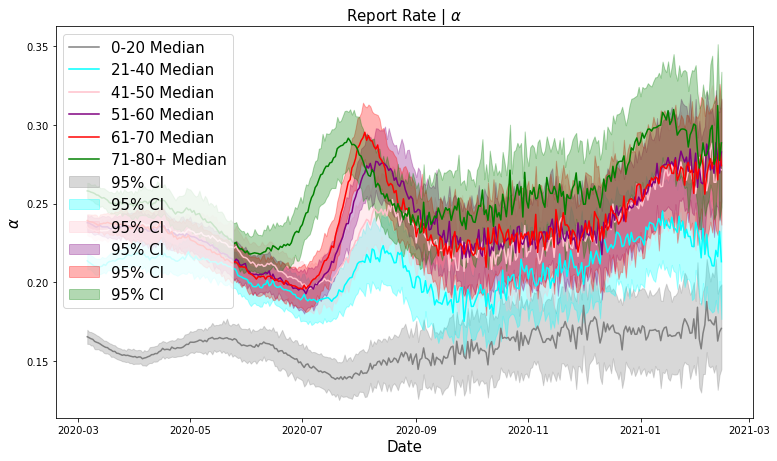

In [41]:
df_alpha0   = create_df_response(alpha_post_time[0,:,:], time=num_steps, dates =dates_assimilation)
df_alpha1   = create_df_response(alpha_post_time[1,:,:], time=num_steps, dates =dates_assimilation)
df_alpha2   = create_df_response(alpha_post_time[2,:,:], time=num_steps, dates =dates_assimilation)
df_alpha3   = create_df_response(alpha_post_time[3,:,:], time=num_steps, dates =dates_assimilation)
df_alpha4   = create_df_response(alpha_post_time[4,:,:], time=num_steps, dates =dates_assimilation)
df_alpha5   = create_df_response(alpha_post_time[5,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))

ax.plot(df_alpha0.index.values, df_alpha0["median"], color='gray', label='0-20 Median')
ax.fill_between(df_alpha0.index.values, df_alpha0["high_95"], df_alpha0["low_95"], color='gray', alpha=0.3, label='95% CI')

ax.plot(df_alpha1.index.values, df_alpha1["median"], color='cyan', label='21-40 Median')
ax.fill_between(df_alpha1.index.values, df_alpha1["high_95"], df_alpha1["low_95"], color='cyan', alpha=0.3, label='95% CI')

ax.plot(df_alpha2.index.values, df_alpha2["median"], color='pink', label='41-50 Median')
ax.fill_between(df_alpha2.index.values, df_alpha2["high_95"], df_alpha2["low_95"], color='pink', alpha=0.3, label='95% CI')

ax.plot(df_alpha3.index.values, df_alpha3["median"], color='purple', label='51-60 Median')
ax.fill_between(df_alpha3.index.values, df_alpha3["high_95"], df_alpha3["low_95"], color='purple', alpha=0.3, label='95% CI')

ax.plot(df_alpha4.index.values, df_alpha4["median"], color='red', label='61-70 Median')
ax.fill_between(df_alpha4.index.values, df_alpha4["high_95"], df_alpha4["low_95"], color='red', alpha=0.3, label='95% CI')

ax.plot(df_alpha5.index.values, df_alpha5["median"], color='green', label='71-80+ Median')
ax.fill_between(df_alpha5.index.values, df_alpha5["high_95"], df_alpha5["low_95"], color='green', alpha=0.3, label='95% CI')

ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel(r"$\alpha$", fontsize=15)
ax.set_title(r"Report Rate | $\alpha$ ", fontsize=15)
ax.legend(fontsize=15, loc='best')

In [42]:
Rt_age = np.zeros((6,200,346))
for i in range(6):
    Rt_age[i,:,:] =beta_post_time*(1-ifr_age[i])*(1/0.25)*(alpha_post_time[i,:,:]+(0.5*(1-alpha_post_time[i,:,:])))

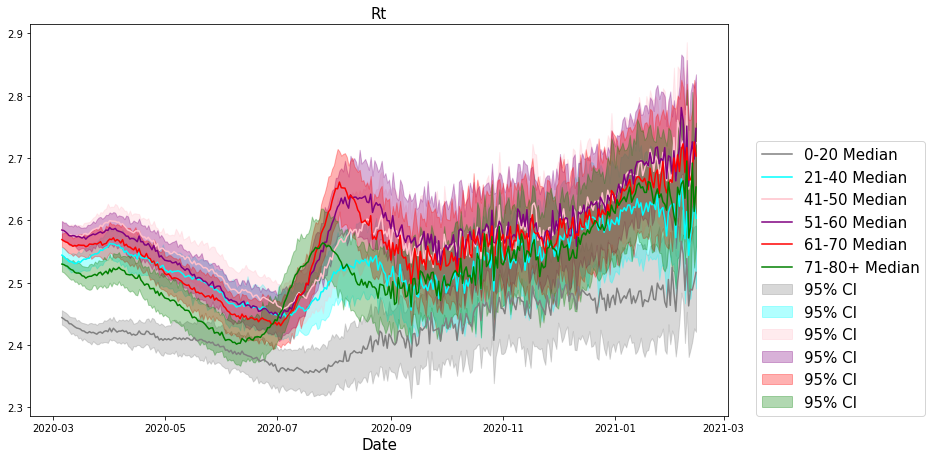

In [43]:
df_Rt0   = create_df_response(Rt_age[0,:,:], time=num_steps, dates =dates_assimilation)
df_Rt1   = create_df_response(Rt_age[1,:,:], time=num_steps, dates =dates_assimilation)
df_Rt2   = create_df_response(Rt_age[2,:,:], time=num_steps, dates =dates_assimilation)
df_Rt3   = create_df_response(Rt_age[3,:,:], time=num_steps, dates =dates_assimilation)
df_Rt4   = create_df_response(Rt_age[4,:,:], time=num_steps, dates =dates_assimilation)
df_Rt5   = create_df_response(Rt_age[5,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))

ax.plot(df_Rt0.index.values, df_Rt0["median"], color='gray', label='0-20 Median')
ax.fill_between(df_Rt0.index.values, df_Rt0["high_95"], df_Rt0["low_95"], color='gray', alpha=0.3, label='95% CI')

ax.plot(df_Rt1.index.values, df_Rt1["median"], color='cyan', label='21-40 Median')
ax.fill_between(df_Rt1.index.values, df_Rt1["high_95"], df_Rt1["low_95"], color='cyan', alpha=0.3, label='95% CI')

ax.plot(df_Rt2.index.values, df_Rt2["median"], color='pink', label='41-50 Median')
ax.fill_between(df_Rt2.index.values, df_Rt2["high_95"], df_Rt2["low_95"], color='pink', alpha=0.3, label='95% CI')

ax.plot(df_Rt3.index.values, df_Rt3["median"], color='purple', label='51-60 Median')
ax.fill_between(df_Rt3.index.values, df_Rt3["high_95"], df_Rt3["low_95"], color='purple', alpha=0.3, label='95% CI')

ax.plot(df_Rt4.index.values, df_Rt4["median"], color='red', label='61-70 Median')
ax.fill_between(df_Rt4.index.values, df_Rt4["high_95"], df_Rt4["low_95"], color='red', alpha=0.3, label='95% CI')

ax.plot(df_Rt5.index.values, df_Rt5["median"], color='green', label='71-80+ Median')
ax.fill_between(df_Rt5.index.values, df_Rt5["high_95"], df_Rt5["low_95"], color='green', alpha=0.3, label='95% CI')

ax.set_xlabel("Date", fontsize=15)
# ax.set_ylabel("", fontsize=15)
ax.set_title("Rt", fontsize=15)
ax.legend(fontsize=15, loc=(1.04,0))

In [46]:
x_post_time.shape

(16, 8, 200, 346)

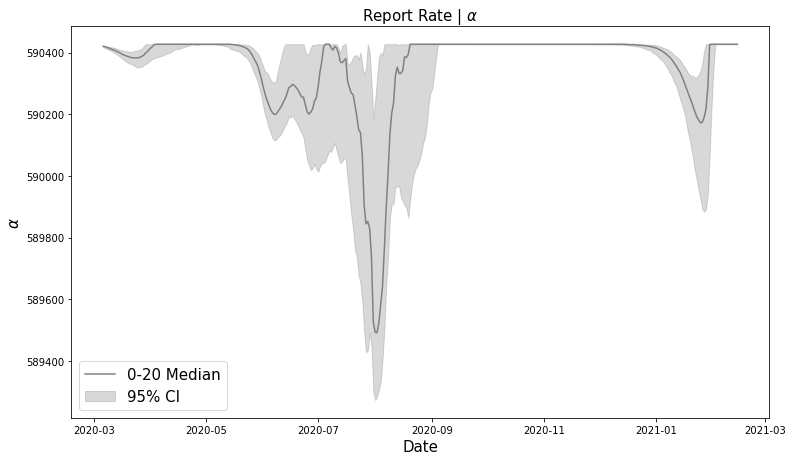

In [49]:

df_alpha0   = create_df_response(x_post_time[0,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha1   = create_df_response(x_post_time[1,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha2   = create_df_response(x_post_time[2,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha3   = create_df_response(x_post_time[3,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha4   = create_df_response(x_post_time[4,0,:,:], time=num_steps, dates =dates_assimilation)
# df_alpha5   = create_df_response(x_post_time[5,0,:,:], time=num_steps, dates =dates_assimilation)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))

ax.plot(df_alpha0.index.values, df_alpha0["median"], color='gray', label='0-20 Median')
ax.fill_between(df_alpha0.index.values, df_alpha0["high_95"], df_alpha0["low_95"], color='gray', alpha=0.3, label='95% CI')

# ax.plot(df_alpha1.index.values, df_alpha1["median"], color='cyan', label='21-40 Median')
# ax.fill_between(df_alpha1.index.values, df_alpha1["high_95"], df_alpha1["low_95"], color='cyan', alpha=0.3, label='95% CI')

# ax.plot(df_alpha2.index.values, df_alpha2["median"], color='pink', label='41-50 Median')
# ax.fill_between(df_alpha2.index.values, df_alpha2["high_95"], df_alpha2["low_95"], color='pink', alpha=0.3, label='95% CI')

# ax.plot(df_alpha3.index.values, df_alpha3["median"], color='purple', label='51-60 Median')
# ax.fill_between(df_alpha3.index.values, df_alpha3["high_95"], df_alpha3["low_95"], color='purple', alpha=0.3, label='95% CI')

# ax.plot(df_alpha4.index.values, df_alpha4["median"], color='red', label='61-70 Median')
# ax.fill_between(df_alpha4.index.values, df_alpha4["high_95"], df_alpha4["low_95"], color='red', alpha=0.3, label='95% CI')

# ax.plot(df_alpha5.index.values, df_alpha5["median"], color='green', label='71-80+ Median')
# ax.fill_between(df_alpha5.index.values, df_alpha5["high_95"], df_alpha5["low_95"], color='green', alpha=0.3, label='95% CI')

ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel(r"$\alpha$", fontsize=15)
ax.set_title(r"Report Rate | $\alpha$ ", fontsize=15)
ax.legend(fontsize=15, loc='best')

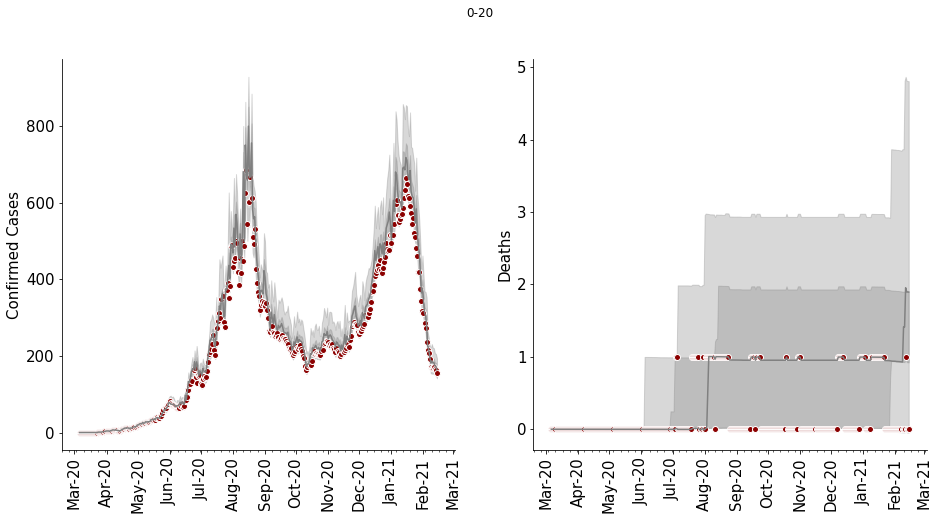

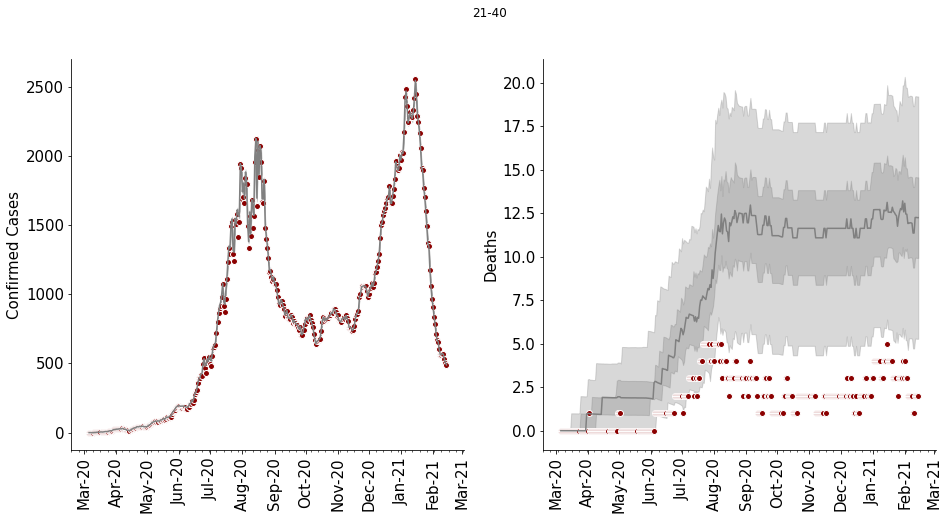

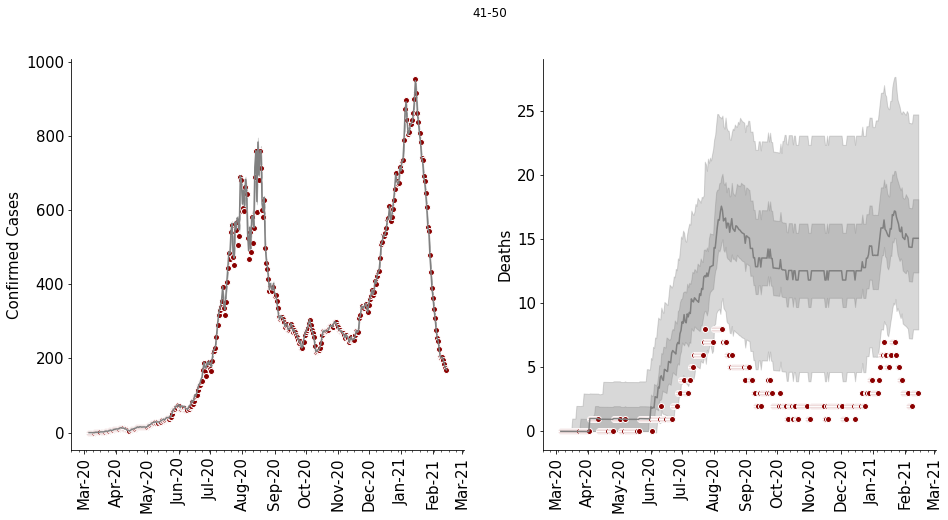

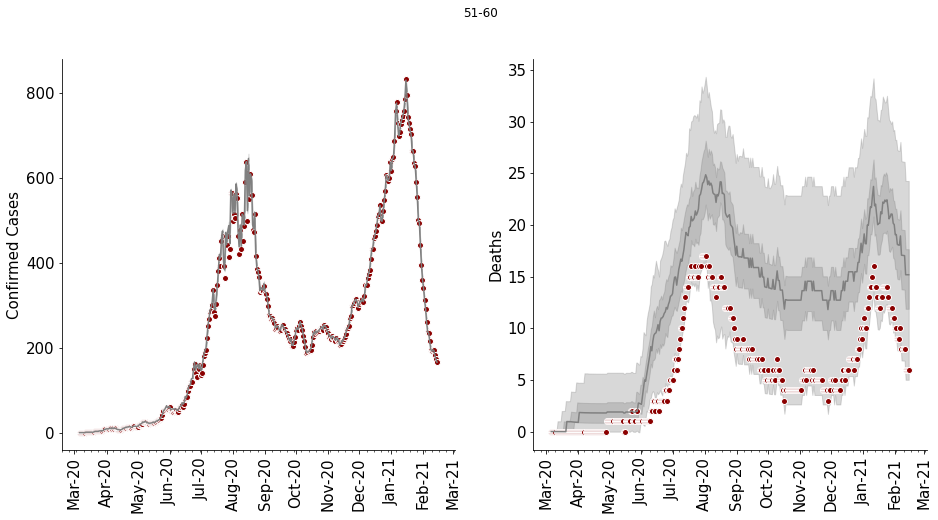

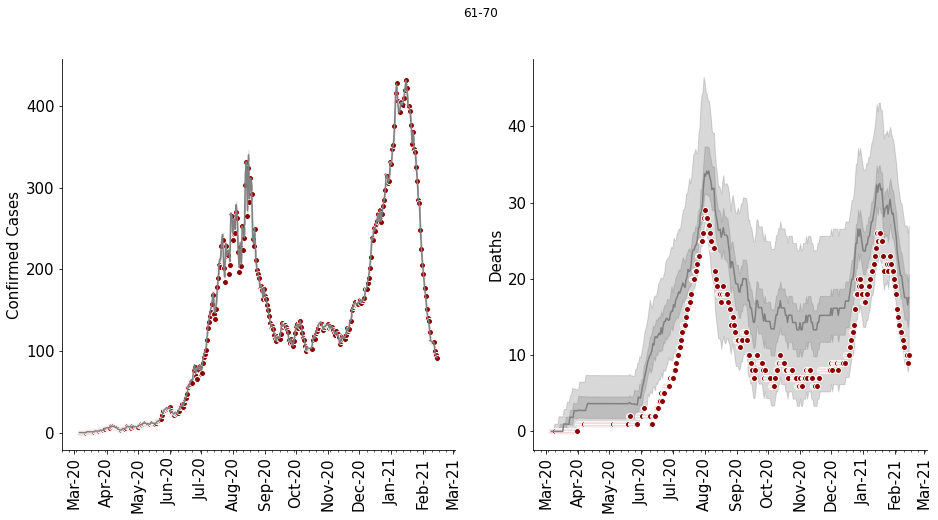

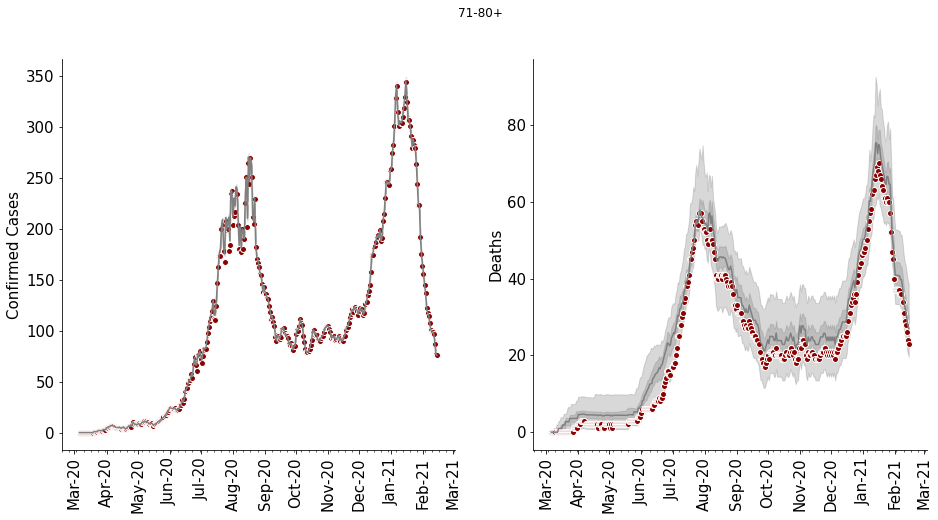

In [50]:
from matplotlib import dates as mdates
take_post     = 10

# confirmed_post_time = np.squeeze(confirmed_post_time[:,:,:,:, :take_post].mean(-1))
# deaths_post_time    = np.squeeze(deaths_post_all[:,:,:,:, :take_post].mean(-1))

df_confirmed  = create_df_response(cases_post_time[0,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[0,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='0-20')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='0-20')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='0-20')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='0-20')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('0-20')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[1,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[1,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='21-40')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='21-40')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='21-40')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='21-40')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('21-40')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[2,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[2,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='41-50')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='41-50')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='41-50')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='41-50')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('41-50')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[3,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[3,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='51-60')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='51-60')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='51-60')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='51-60')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('51-60')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[4,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[4,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='61-70')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='61-70')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='61-70')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='61-70')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('61-70')
plt.show()

df_confirmed  = create_df_response(confirmed_post_time[5,:,:], time=num_steps, dates =dates_assimilation)
df_deaths     = create_df_response(deaths_post_time[5,:,:], time=num_steps, dates =dates_assimilation)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

ax[0].plot(df_deaths.index.values, df_confirmed["median"], color='gray', label='Median')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_95"], df_confirmed["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[0].fill_between(df_confirmed.index.values, df_confirmed["high_50"], df_confirmed["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[0].scatter(obs_df[(obs_df.index.get_level_values(1)=='71-80+')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='71-80+')]["smoothed_confirmed"], edgecolors="w", facecolor="darkred")

ax[1].plot(df_deaths.index.values, df_deaths["median"], color='gray', label='Median')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_95"], df_deaths["low_95"], color='gray', alpha=0.3, label='95% CI')
ax[1].fill_between(df_deaths.index.values, df_deaths["high_50"], df_deaths["low_50"], color='gray', alpha=0.3, label='50% CI')
ax[1].scatter(obs_df[(obs_df.index.get_level_values(1)=='71-80+')].index.get_level_values(0), obs_df[(obs_df.index.get_level_values(1)=='71-80+')]["smoothed_deaths"], edgecolors="w", facecolor="darkred")

for axi in ax.flatten():
    axi.xaxis.set_major_locator(mdates.MonthLocator())
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
    axi.xaxis.set_minor_locator(mdates.WeekdayLocator())
    axi.tick_params( which='both', axis='both', labelsize=15)
    axi.tick_params( which='both', axis='x', rotation=90, labelsize=15)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[0].set_ylabel("Confirmed Cases", fontsize=15)
ax[1].set_ylabel("Deaths", fontsize=15)
plt.suptitle('71-80+')
plt.show()